




This assignment is designed to help you gain hands-on experience with key deep learning architectures and multimodal learning. You will work through four questions that gradually increase in complexity. The first question is a warm-up exercise to reinforce foundational concepts. The second question focuses on image classification using Convolutional Neural Networks (CNNs). The third explores sequence modeling with sequence models for text data. The final question integrates both image and text modalities to develop a multimodal model. Through this assignment, you will deepen your understanding of how different neural architectures are applied in practice and how they can be combined to solve complex tasks.

# Question 1: "Reciprocal" Tariff Rate


During his second presidency, United States President Donald Trump enacted a series of steep protective tariffs affecting nearly all goods imported into the United States. Between January and April 2025, the average effective US tariff rate rose from 2.5% to an estimated 27%—the highest level in over a century. On April 2—a day he called "Liberation Day"—Trump announced a minimum 10% tariff on all US imports, effective April 5, and higher tariffs on imports from 57 countries. The announcement of these controversially named "reciprocal tariffs" prompted retaliation from trade partners. According to the Trump administration's reciprocal tariff formula, trade deficits are seen as inherently harmful and in need of removal.


In this warm-up question, let's use neural network to infer what tariff rate is imposed to each country. Load the data from the attached excel sheet:

In [ ]:

import pandas as pd
import numpy as np

# Read the Excel file
df = pd.read_excel('/content/Reciprocal-Tariff-List-by-Country-April-2-1.xlsx')

df = df[['Country', 'Tariffs Charged USA (Including Currency Manipulation and Trade Barriers)',
         'USA Discounted Reciprocal Tariffs']]

df.head()

,Country,Tariffs Charged USA (Including Currency Manipulation and Trade Barriers),USA Discounted Reciprocal Tariffs
0,Afghanistan,0.49,0.10
1,Albania,0.10,0.10
2,Algeria,0.59,0.30
3,Andorra,0.10,0.10
4,Angola,0.63,0.32


Let's make a plot between the claimed tariff rate charged to USA and reciprocal tariff rate by USA

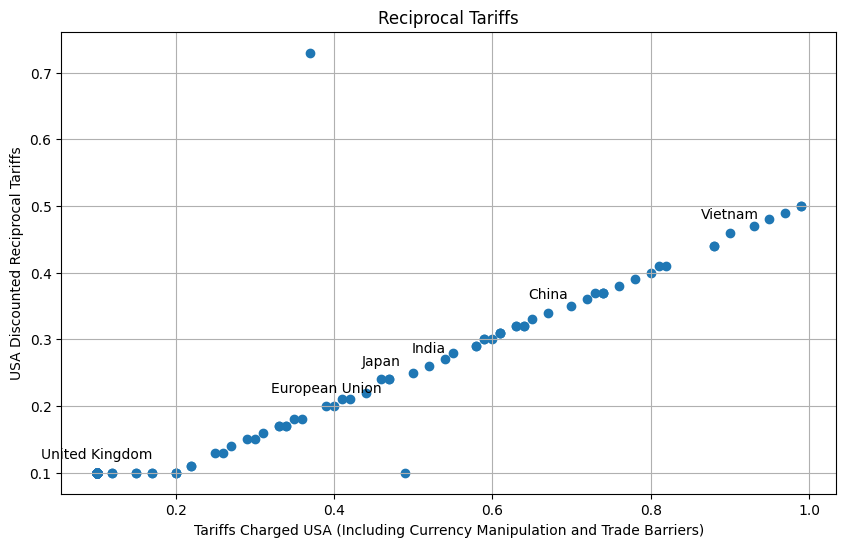

In [ ]:

import matplotlib.pyplot as plt

# Select data for the scatter plot
x = df['Tariffs Charged USA (Including Currency Manipulation and Trade Barriers)']
y = df['USA Discounted Reciprocal Tariffs']
countries = df['Country']

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y)
plt.xlabel('Tariffs Charged USA (Including Currency Manipulation and Trade Barriers)')
plt.ylabel('USA Discounted Reciprocal Tariffs')
plt.title('Reciprocal Tariffs')

# Highlight specific countries
countries_to_highlight = ['China', 'Japan', 'European Union', 'United Kingdom', 'India', 'Vietnam']
for i, country in enumerate(countries):
    if country in countries_to_highlight:
        plt.annotate(country, (x[i], y[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.grid(True)
plt.show()


Let's which country get the highest and lowest tariff rate according to the formula

In [ ]:

# Calculate the ratio
df['Ratio'] = df['USA Discounted Reciprocal Tariffs'] / df['Tariffs Charged USA (Including Currency Manipulation and Trade Barriers)']

# Find the country with the largest ratio
largest_ratio_country = df.loc[df['Ratio'].idxmax()]

# Find the country with the smallest ratio
smallest_ratio_country = df.loc[df['Ratio'].idxmin()]

# Output the results
print("Country with the largest ratio:")
print(largest_ratio_country['Country'])
print("\nCountry with the smallest ratio:")
print(smallest_ratio_country['Country'])


Country with the largest ratio:
Reunion

Country with the smallest ratio:
Afghanistan


The detailed formula released by United State Trade Representative is available [here](https://ustr.gov/sites/default/files/files/Issue_Areas/Presidential%20Tariff%20Action/Reciprocal%20Tariff%20Calculations.pdf)


Consider an environment in which the U.S. levies a tariff of rate τ_i on country i and ∆τ_i
reflects the change in the tariff rate. Let ε<0 represent the elasticity of imports with respect to
import prices, let φ>0 represent the passthrough from tariffs to import prices, let m_i>0 represent
total imports from country i, and let x_i>0 represent total exports. Then the decrease in imports
due to a change in tariffs equals ∆τ_i*ε*φ*m_i<0. Assuming that offsetting exchange rate and
general equilibrium effects are small enough to be ignored, the reciprocal tariff that results in a
bilateral trade balance of zero satisfies:

$∆τ_i = \frac{x_i-m_i}{ε*φ*m_i}$

It looks convoluted, right? Now let's decipher USTR's tariff rate calculations.  

According to USTR, Parameter values for ε and φ were selected. The price elasticity of import demand, ε, was set at 4 and the elasticity of import prices with respect to tariffs, φ, is 0.25. Therefore, this makes the tariff rate τ_i to be:

$∆τ_i = \frac{x_i-m_i}{ε*φ*m_i} = \frac{x_i-m_i}{m_i}=\frac{\text{U.S. Exports to country i}−\text{U.S. Imports from country i}}{\text{U.S. Imports from country i}}$


Now let's validate it with the US trade data obtained from US census bureau at [here:](https://www.census.gov/foreign-trade/balance/country.xlsx)

Load the data and match the countries with the tariff rate table for the trade in year 2024


In [ ]:
import pandas as pd
import requests
from io import BytesIO

# Download the Excel file from the URL
url = "https://www.census.gov/foreign-trade/balance/country.xlsx"
response = requests.get(url)
response.raise_for_status()  # Raise an exception for bad status codes

# Read the Excel file from the downloaded content
trade = pd.read_excel(BytesIO(response.content))

# Now you can work with the DataFrame 'df'
print(trade.head())


   year  CTY_CODE         CTYNAME     IJAN     IFEB     IMAR     IAPR  \
0  1997         3  European Union  11644.9  11764.7  13616.9  13577.4   
1  1998         3  European Union  12883.4  12954.5  15970.6  15144.0   
2  1999         3  European Union  13700.7  14788.6  17131.3  16129.8   
3  2000         3  European Union  15771.3  17227.4  20757.7  18285.4   
4  2001         3  European Union  19413.6  18491.1  20720.2  19677.4   

      IMAY     IJUN     IJUL  ...     EAPR     EMAY     EJUN     EJUL  \
0  13528.9  13183.1  14865.8  ...  12450.5  12270.2  11868.4  10657.2   
1  14374.4  15502.9  16224.6  ...  12271.3  12951.0  12666.8  11275.9   
2  16035.2  17217.8  17873.4  ...  13091.2  12931.7  12393.7  11484.5   
3  19341.8  18583.1  18982.7  ...  13860.9  14224.1  14220.4  12235.6   
4  19596.3  18334.9  20129.0  ...  13949.0  14427.2  13996.9  11531.9   

      EAUG     ESEP     EOCT     ENOV     EDEC       EYR  
0  11042.0  11833.8  12773.9  11994.2  12816.9  143931.4  
1  1

In [ ]:

import pandas as pd
# Assuming 'df' and 'trade' are already defined as in the previous code

# Convert relevant columns to string type for matching
df['Country'] = df['Country'].astype(str)
trade['CTYNAME'] = trade['CTYNAME'].astype(str)

# Filter trade data for the year 2025
trade_2024 = trade.loc[trade['year'] == 2024, ['CTYNAME', 'IYR', 'EYR']]

# Merge the dataframes based on country and CTYNAME
merged_df = pd.merge(df, trade_2024, left_on='Country', right_on='CTYNAME', how='inner')


merged_df


,Country,Tariffs Charged USA (Including Currency Manipulation and Trade Barriers),USA Discounted Reciprocal Tariffs,Ratio,CTYNAME,IYR,EYR
0,Afghanistan,0.49,0.10,0.204082,Afghanistan,22.588359,11.446788
1,Albania,0.10,0.10,1.000000,Albania,128.280409,141.727893
2,Algeria,0.59,0.30,0.508475,Algeria,2461.611142,1014.504109
3,Andorra,0.10,0.10,1.000000,Andorra,3.369249,4.911141
4,Angola,0.63,0.32,0.507937,Angola,1869.239166,682.352869
...,...,...,...,...,...,...,...
163,Vanuatu,0.44,0.22,0.500000,Vanuatu,13.667021,7.601059
164,Venezuela,0.29,0.15,0.517241,Venezuela,5987.862777,4232.021935
165,Vietnam,0.90,0.46,0.511111,Vietnam,136561.155809,13098.155121
166,Zambia,0.33,0.17,0.515152,Zambia,169.112021,113.762941


Create the column trade deficit as (IYR-EYR)/EYR and look at its correlation with Tariffs Charged USA


In [ ]:

# Calculate the new column
merged_df['deficit'] = (merged_df['EYR'] - merged_df['IYR']) / merged_df['IYR'] * 100



The correlation between deficit and tariffs for countries with negative deficits is: 0.9834173394354189


<ipython-input-7-b21ec5845105>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_deficit_countries['deficit'] = negative_deficit_countries['deficit'].abs()


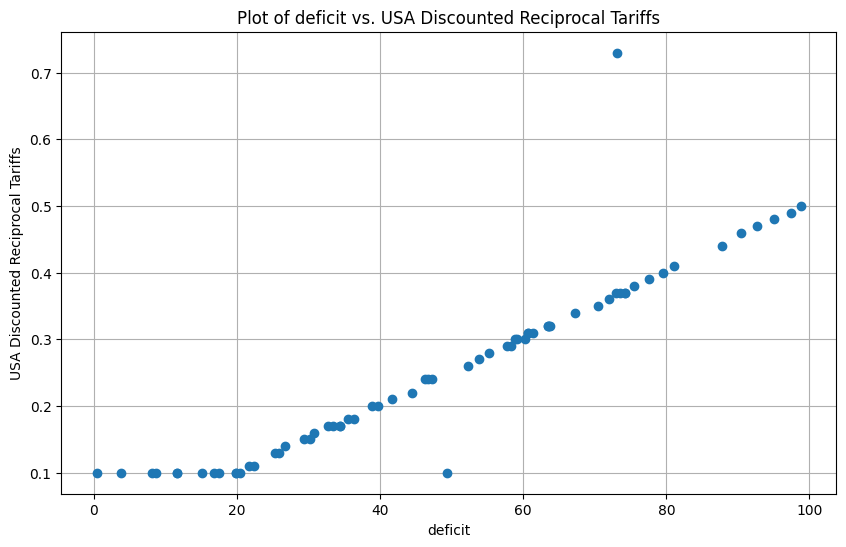

In [ ]:

import matplotlib.pyplot as plt
# Assuming merged_df is already defined as in the previous code

# Filter for countries with negative deficits
negative_deficit_countries = merged_df[merged_df['deficit'] < 0]
negative_deficit_countries['deficit'] = negative_deficit_countries['deficit'].abs()

# Calculate the correlation between deficit and tariffs for these countries
correlation = negative_deficit_countries['deficit'].corr(negative_deficit_countries['Tariffs Charged USA (Including Currency Manipulation and Trade Barriers)'])

print(f"The correlation between deficit and tariffs for countries with negative deficits is: {correlation}")

# Create the plot for countries with negative deficits
plt.figure(figsize=(10, 6))
#plt.plot( negative_deficit_countries['deficit'], negative_deficit_countries['Tariffs Charged USA (Including Currency Manipulation and Trade Barriers)'],'o')
plt.plot( negative_deficit_countries['deficit'], negative_deficit_countries['USA Discounted Reciprocal Tariffs'],'o')
plt.xlabel('deficit')
plt.ylabel('USA Discounted Reciprocal Tariffs')
plt.title('Plot of deficit vs. USA Discounted Reciprocal Tariffs')
plt.grid(True)
plt.show()


Now build a simple neural network using one feature trade deficit as the input and USA Discounted Reciprocal Tariffs as the output in Pytorch. with one hidden layers, that is just one input and one output layer, choose the activation function that looks similar from the plot


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Use CPU
device = torch.device("cpu")

# Prepare the data
if 'deficit' not in merged_df.columns:
    merged_df['deficit'] = (merged_df['EYR'] - merged_df['IYR']) / merged_df['IYR'] * 100

negative_df = merged_df[merged_df['deficit'] < 0].copy()
negative_df['deficit'] = negative_df['deficit'].abs()

X = negative_df[['deficit']].values.astype(np.float32)
y = negative_df[['USA Discounted Reciprocal Tariffs']].values.astype(np.float32)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_tensor = torch.tensor(X_scaled).to(device)
y_tensor = torch.tensor(y).to(device)

# Define model
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(1, 10)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(10, 1)

    def forward(self, x):
        return self.fc2(self.relu(self.fc1(x)))

model = SimpleNN().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

Train the model and show the R2 score:

Make the plot between y and predictions against rounded deficit


R² Score: 0.8739


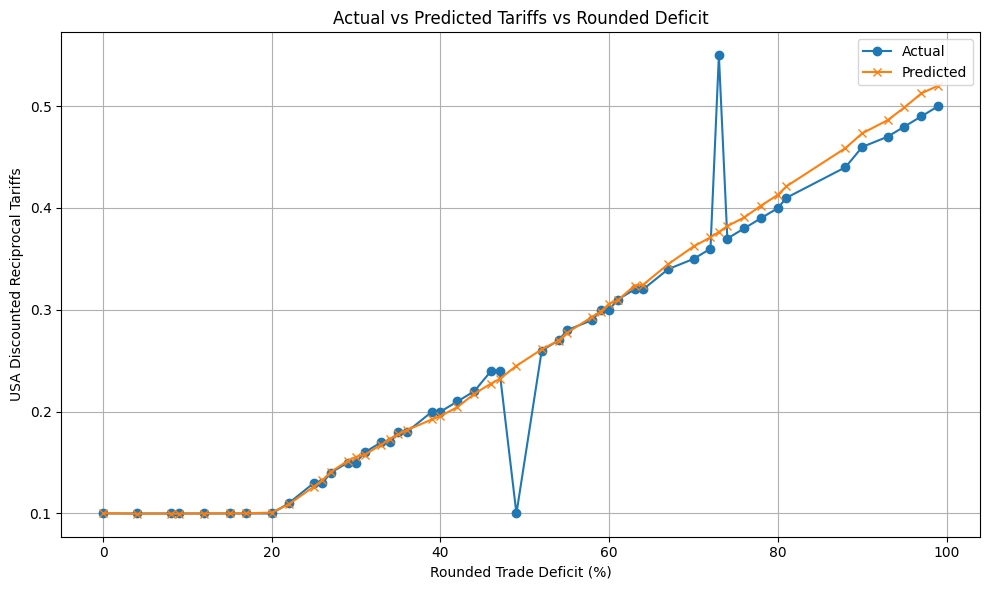

In [ ]:
# Train
epochs = 1000
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    predictions = model(X_tensor)
    loss = criterion(predictions, y_tensor)
    loss.backward()
    optimizer.step()

# Predict
model.eval()
with torch.no_grad():
    y_pred = model(X_tensor).cpu().numpy()

# R² score
r2 = r2_score(y, y_pred)
print(f"R² Score: {r2:.4f}")

# Plot: y and prediction vs rounded deficit
rounded_deficit = negative_df['deficit'].round()
plot_df = pd.DataFrame({
    'Rounded Deficit': rounded_deficit,
    'Actual': y.flatten(),
    'Predicted': y_pred.flatten()
})

grouped = plot_df.groupby('Rounded Deficit').mean()

plt.figure(figsize=(10, 6))
plt.plot(grouped.index, grouped['Actual'], label='Actual', marker='o')
plt.plot(grouped.index, grouped['Predicted'], label='Predicted', marker='x')
plt.xlabel('Rounded Trade Deficit (%)')
plt.ylabel('USA Discounted Reciprocal Tariffs')
plt.title('Actual vs Predicted Tariffs vs Rounded Deficit')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Question 2. Detecting AI-generated fake reviews

Online  reviews  on  digital  platforms  are  known  to  signif-icantly  influence  consumer  decisions  and  trust  in  prod-ucts  and  services. While  online  reviews  are  vital  for  consumer  decision-making, the credibility of UGC is increasingly compromised by the prevalence of fake reviews. These deceptive reviews, whether overly positive or negative, are intended to manipu-late consumer perceptions and distort the online marketplace.  Large Language Models (LLMs) are becoming indistinguishable at producing content with high accessibility and lowcost, pose a newchallenge in the proliferation of machine-generated fake reviews.

In this question, you are tasked to build a fake review detector to identify AI-generated fake reviews. The details of generated dataset can be found at [Gambetti and Han (2024)](https://ojs.aaai.org/index.php/ICWSM/article/view/31437) and the link of the data is available at [here](https://zenodo.org/records/10511456)

The variables are as follows:

Variables description:

- ID: Unique identifier. It maps to each review, either generated or authentic, and to each image.
text: Review text.
- label: Binary label indicating the class (0=authentic, 1=machine-generated).
- automated_readability_index: Approximate US grade level needed to comprehend the text.
- difficult_words: Number of difficult words from Dale-Chall world list.
- flesch_reading_ease: Score on a scale from 0 to 100, with higher scores indicating easier readability.
gunning_fog: Years of formal education a person needs to understand a text easily.
- words_per_sentence: Average number of words per sentence.
- reading_time: Reading time.
- ppl: Perplexity score from zero-shot GPTNeo 125M.
- bright: Brightness. Average of V of the HSV image representation.
- sat: Saturation. Color intensity and purity of an image. Average of S of the HSV image representation.
- clar: Clarity. Well-defined objects in space. % of normalized V pixels that exceed 0.7 of HSV.
- cont: Contrast. Spread of illumination. Standard deviation of V of the HSV image representation.
- warm: Warmth. Warm colors: from red to yellow. % of H<60 or
 than 220 of HSV.
- colorf: Colorfulness. Departure from a grey-scale image.
- sd: Size difference. Difference in the number of pixels between the figure and the ground
- cd: Color difference. Difference of Euclidian distance between the figure and ground (RGB vectors).
- td: Texture difference. Absolute difference between the foreground and background edge density.
- diag_dom: Diagonal dominance. Manhattan distance between salient region and each diagonal.
- rot: Rule of thirds. Minimum distance between center of salient region and each of the four intersection points.
- hpvb: Horizontal physical visual balance. Split image horizontally. Horizontal physical symmetry (mirroring).
- vpvb: Vertical physical visual balance. Split image vertically. Vertical physical symmetry (mirroring)
- hcvb: Horizontal color visual balance. Split image horizontally. Horizontal mirrored Euclidean cross-pixels distance.
- vcvb: Vertical color visual balance. Split image vertically. Vertical mirrored Euclidean cross-pixels distance.

For simplicity, we will use the validation set for training and test set for testing.


## Question 2.1  Detecting AI-generated fake reviews using images only

Let's build a convolutional neural network (CNN) model with the same model architecture as LeNet-5 from scratch to detecting AI-generated fake reviews from images. This means we would need to classify the AI-generated images and human-generated images. Show your model architecture, number of parameters and the performance on both validation set and test set.


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving images.zip to images.zip


In [ ]:
import zipfile
import os

os.makedirs("/content/images", exist_ok=True)


with zipfile.ZipFile("images.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/images")

In [ ]:
import zipfile
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import pandas as pd

# --- 1. Setup and Unzip ---

extract_base_dir = "/content/images_extracted"
os.makedirs(extract_base_dir, exist_ok=True)
zip_file_path = "images.zip"


if os.path.exists(zip_file_path):
    try:
        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            zip_ref.extractall(extract_base_dir)
        print(f"Files unzipped successfully into '{extract_base_dir}'.")
    except zipfile.BadZipFile:
        print(f"Error: '{zip_file_path}' is not a valid zip file or is corrupted.")
        exit()
    except Exception as e:
        print(f"An error occurred during unzipping: {e}")
        exit()
else:
    print(f"Error: '{zip_file_path}' not found. Please upload the zip file.")
    exit()

# --- 2. Determine Actual Image Directory ---
print(f"\nChecking contents of '{extract_base_dir}'...")
image_directory = None #
try:
    extracted_contents = os.listdir(extract_base_dir)
    print(f"Found {len(extracted_contents)} item(s) in '{extract_base_dir}'.")

    if not extracted_contents:
        print(f"Warning: '{extract_base_dir}' is empty after unzipping!")
        image_directory = extract_base_dir

    elif len(extracted_contents) == 1 and os.path.isdir(os.path.join(extract_base_dir, extracted_contents[0])):
        # Check if there's ONE subdirectory containing the images
        actual_image_subdir = extracted_contents[0]
        image_directory = os.path.join(extract_base_dir, actual_image_subdir)
        print(f"Detected images are inside a subdirectory: '{actual_image_subdir}'")
        print(f"Setting image_directory to: '{image_directory}'")
        # Optional: List first few files in the actual directory
        try:
            actual_files = os.listdir(image_directory)
            print(f"First few items in '{image_directory}': {actual_files[:5]}")
        except Exception as e:
             print(f"Could not list contents of '{image_directory}': {e}")

    else:
        # Assume images are directly in the extract_base_dir
        image_directory = extract_base_dir
        print(f"Assuming images are directly in: '{image_directory}'")
        print(f"First few items found: {extracted_contents[:5]}")


except FileNotFoundError:
    print(f"Error: '{extract_base_dir}' directory not found after attempting unzipping.")
    exit()
except Exception as e:
    print(f"An error occurred while checking the extraction directory: {e}")
    exit()

if image_directory is None:
     print("Error: Could not determine the image directory. Exiting.")
     exit()

# --- 3. Helper Function: Robust Path Creation ---
def create_image_path(base_dir, image_id):
    """Consistently creates the image path."""
    if pd.isna(image_id):
        return None # Handle potential NaN directly


    image_id_str = str(image_id).strip().lower()


    if not image_id_str.endswith('.jpg'):
        filename = f"{image_id_str}.jpg"
    else:

        filename = image_id_str

    return os.path.join(base_dir, filename)

# --- 4. Dataset Class ---
class FakeReviewImageDataset(Dataset):
    def __init__(self, df, image_dir, transform=None):
        # Ensure the DataFrame passed is not empty
        if df.empty:
            raise ValueError("Input DataFrame to FakeReviewImageDataset is empty.")
        self.df = df.reset_index(drop=True) # Reset index for clean iloc access
        self.image_dir = image_dir
        self.transform = transform
        print(f"Dataset initialized with {len(self.df)} samples. Image directory: '{self.image_dir}'")


    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        # Get ID and label
        row = self.df.iloc[idx]
        image_id_raw = row['ID']
        label = row['label']

        # Create image path using the helper function
        img_path = create_image_path(self.image_dir, image_id_raw)

        if img_path is None:
            print(f"Warning: Null/NaN ID found at index {idx}. Skipping.")
            return None, None # Return None for missing/invalid ID

        # Check if file exists (should mostly be true after filtering, but good safety check)
        if os.path.exists(img_path):
            try:
                # Open and convert image
                image = Image.open(img_path).convert('RGB')
            except Exception as e:
                 print(f"Error opening image '{img_path}' at index {idx}: {e}. Skipping.")
                 return None, None # Return None if image cannot be opened

            # Apply transforms if any
            if self.transform:
                image = self.transform(image)

            # Ensure label is a tensor and correct dtype
            return image, torch.tensor(label, dtype=torch.long)

        else:
            # This indicates a potential issue if filtering didn't catch it, or ID was processed differently.
            print(f"Warning: Image path not found during __getitem__ (should have been filtered): {img_path}")
            return None, None # Return None for missing file


# --- 5. Custom Collate Function ---
def collate_fn_filtered(batch):
    # Filter out None items resulting from errors in __getitem__
    batch = [item for item in batch if item is not None and item[0] is not None]
    if not batch:
        # If the entire batch was filtered out, return None
        # The training loop needs to handle this case
        return None, None
    # Use default collate for valid items
    return torch.utils.data.dataloader.default_collate(batch)


# --- 6. Filter Missing Images Function ---
def filter_missing_images(df, image_dir):
    initial_count = len(df)
    print(f"\nFiltering DataFrame. Initial size: {initial_count}")
    if initial_count == 0:
        print("Input DataFrame is already empty. No filtering needed.")
        return df
    if df['ID'].isnull().any():
        print(f"Warning: Found {df['ID'].isnull().sum()} null values in 'ID' column before filtering.")

    print(f"Checking for image files in directory: '{image_dir}'")

    # --- Debugging: Print sample ID processing ---
    if initial_count > 0:
        sample_id_raw = df.iloc[0]['ID']
        print(f"Sample raw ID from CSV: '{sample_id_raw}' (type: {type(sample_id_raw)})")
        sample_path = create_image_path(image_dir, sample_id_raw)
        print(f"Sample constructed path: '{sample_path}'")
        if sample_path:
             print(f"Exists? {os.path.exists(sample_path)}")
    # --- End Debugging ---

    # Apply the path creation function to the 'ID' column
    df['image_path'] = df['ID'].apply(lambda x: create_image_path(image_dir, x))

    # Create a boolean mask for existing paths (handle None paths from null IDs)
    exists_mask = df['image_path'].apply(lambda p: os.path.exists(p) if p is not None else False)

    # Filter the DataFrame
    df_filtered = df[exists_mask].copy()
    final_count = len(df_filtered)
    missing_count = initial_count - final_count

    if missing_count > 0:
        print(f"Warning: Filtered out {missing_count} rows due to missing image files or invalid IDs.")
        # Show examples of paths that were expected but not found
        missing_paths = df.loc[~exists_mask, 'image_path'].dropna().unique()
        print(f"Examples of missing paths (up to 5): {missing_paths[:5].tolist()}")
    else:
        print("No rows filtered. All image paths seem valid.")

    print(f"Filtered DataFrame size: {final_count}")
    # Drop the temporary path column before returning
    return df_filtered.drop(columns=['image_path'])


# --- 7. Load CSV Data ---
try:
    train_df_raw = pd.read_csv("/content/val.csv") # Using val.csv as train set as per original code
    test_df_raw  = pd.read_csv("/content/test.csv")
    print("\nCSV files loaded successfully.")
    print(f"Raw train/validation set size: {len(train_df_raw)}")
    print(f"Raw test set size: {len(test_df_raw)}")
except FileNotFoundError as e:
    print(f"Error loading CSV: {e}. Please ensure val.csv and test.csv are in /content/.")
    exit()
except Exception as e:
    print(f"An error occurred reading the CSV files: {e}")
    exit()

# --- 8. Filter DataFrames ---
# Use the determined image_directory
train_df = filter_missing_images(train_df_raw, image_directory)
test_df  = filter_missing_images(test_df_raw, image_directory)

# Check if dataframes are empty after filtering - CRITICAL CHECK
if train_df.empty:
    print("\nError: Train DataFrame is empty after filtering. No valid image paths found for 'val.csv' IDs.")

if test_df.empty:
    print("\nError: Test DataFrame is empty after filtering. No valid image paths found for 'test.csv' IDs.")



# --- 9. Transforms, Datasets, DataLoaders ---
# LeNet-5 typically uses 32x32 grayscale, but adapting for 32x32 RGB
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),

    # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) # Example: ImageNet stats
])

# Create DataLoaders ONLY if the DataFrames are not empty
train_loader = None
if not train_df.empty:
    try:
        train_data = FakeReviewImageDataset(train_df, image_directory, transform)
        train_loader = DataLoader(train_data, batch_size=32, shuffle=True, collate_fn=collate_fn_filtered, num_workers=2, pin_memory=True) # Added num_workers/pin_memory
        print(f"\nTrain DataLoader created successfully with {len(train_data)} samples.")
    except ValueError as e:
        print(f"Error creating Train Dataset: {e}") # Catch error if df was somehow empty despite check
    except Exception as e:
        print(f"An unexpected error occurred creating Train Dataloader: {e}")
else:
    print("\nSkipping Train DataLoader creation because train_df is empty.")

test_loader = None
if not test_df.empty:
    try:
        test_data  = FakeReviewImageDataset(test_df, image_directory, transform)
        test_loader  = DataLoader(test_data, batch_size=32, shuffle=False, collate_fn=collate_fn_filtered, num_workers=2, pin_memory=True) # Added num_workers/pin_memory
        print(f"Test DataLoader created successfully with {len(test_data)} samples.")
    except ValueError as e:
        print(f"Error creating Test Dataset: {e}")
    except Exception as e:
        print(f"An unexpected error occurred creating Test Dataloader: {e}")
else:
    print("Skipping Test DataLoader creation because test_df is empty.")


# --- 10. Define LeNet-5 Model ---
class LeNet5(nn.Module):
    def __init__(self, num_classes=2): # Make num_classes configurable
        super(LeNet5, self).__init__()
        # Input: 3x32x32 (RGB)
        self.conv1 = nn.Conv2d(3, 6, kernel_size=5, padding=0) # 32x32 -> 28x28
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)    # 28x28 -> 14x14
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5, padding=0) # 14x14 -> 10x10
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)    # 10x10 -> 5x5
        self.relu2 = nn.ReLU()

        # Calculate flattened size: 16 channels * 5 height * 5 width
        self.flattened_size = 16 * 5 * 5
        self.fc1 = nn.Linear(self.flattened_size, 120)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(120, 84)
        self.relu4 = nn.ReLU()
        self.fc3 = nn.Linear(84, num_classes) # Output layer for num_classes

    def forward(self, x):
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))
        # Flatten the tensor
        x = x.view(-1, self.flattened_size)
        x = self.relu3(self.fc1(x))
        x = self.relu4(self.fc2(x))
        x = self.fc3(x) # No activation here, CrossEntropyLoss applies softmax
        return x

# --- 11. Setup Training ---
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"\nUsing device: {device}")

model = LeNet5(num_classes=2).to(device)
criterion = nn.CrossEntropyLoss()

# --- 12. Training and Evaluation ---
# Only proceed if BOTH DataLoaders were successfully created
if train_loader is not None and test_loader is not None:
    print("\nStarting Training...")
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Evaluation function
    def evaluate(loader, model, device):
        if loader is None:
            print("Evaluation loader is None. Skipping evaluation.")
            return 0.0 # Return 0 accuracy if loader is None

        model.eval() # Set model to evaluation mode
        correct = 0
        total = 0
        with torch.no_grad(): # Disable gradient calculation
            for images, labels in loader:
                # Handle potentially empty batches from collate_fn
                if images is None or labels is None:
                    print("Warning: Skipping an empty batch in evaluation.")
                    continue

                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1) # Get the index of the max log-probability

                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        accuracy = 100 * correct / total if total > 0 else 0
        print(f'Evaluation Accuracy: {accuracy:.2f}% ({correct}/{total})')
        return accuracy # Return accuracy percentage

    # Training loop
    epochs = 10
    for epoch in range(epochs):
        model.train() # Set model to training mode
        running_loss = 0.0
        batches_processed = 0
        for i, (images, labels) in enumerate(train_loader):
            # Handle potentially empty batches from collate_fn
            if images is None or labels is None:
                 print(f"Warning: Skipping empty batch {i+1}/{len(train_loader)} in epoch {epoch+1}.")
                 continue

            images, labels = images.to(device), labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward pass and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            batches_processed += 1

            # Print stats every N batches
            if (i + 1) % 50 == 0:
                print(f"Epoch [{epoch+1}/{epochs}], Batch [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}")

        # Calculate epoch loss
        epoch_loss = running_loss / batches_processed if batches_processed > 0 else 0
        print(f"\nEpoch [{epoch+1}/{epochs}] Completed. Average Training Loss: {epoch_loss:.4f}")

        # Evaluate on test set after each epoch
        test_acc = evaluate(test_loader, model, device)
        print(f"Epoch [{epoch+1}/{epochs}], Test Accuracy: {test_acc:.2f}%")
        print("-" * 30)


    print("\nTraining Finished.")

    # Final evaluation on the test set
    print("\nFinal Evaluation on Test Set:")
    evaluate(test_loader, model, device)

    # Print model architecture and parameter count
    print("\nModel Architecture:")
    print(model)

    def count_parameters(model):
        return sum(p.numel() for p in model.parameters() if p.requires_grad)

    print(f"\nNumber of trainable parameters: {count_parameters(model):,}")

else:
    print("\nSkipping model training and evaluation because one or both DataLoaders could not be created (likely due to missing image files).")
    print("Please check the output above for errors related to file paths and filtering.")

Files unzipped successfully into '/content/images_extracted'.

Checking contents of '/content/images_extracted'...
Found 1 item(s) in '/content/images_extracted'.
Detected images are inside a subdirectory: 'images'
Setting image_directory to: '/content/images_extracted/images'
First few items in '/content/images_extracted/images': ['10417.jpg', '6183.jpg', '19882.jpg', '11489.jpg', '14318.jpg']

CSV files loaded successfully.
Raw train/validation set size: 4028
Raw test set size: 4030

Filtering DataFrame. Initial size: 4028
Checking for image files in directory: '/content/images_extracted/images'
Sample raw ID from CSV: '8473' (type: <class 'numpy.int64'>)
Sample constructed path: '/content/images_extracted/images/8473.jpg'
Exists? True
No rows filtered. All image paths seem valid.
Filtered DataFrame size: 4028

Filtering DataFrame. Initial size: 4030
Checking for image files in directory: '/content/images_extracted/images'
Sample raw ID from CSV: '10379' (type: <class 'numpy.int64'>)

## Question 2.2 Transfer Learning for AI-generated fake review detection

Now let's use the pretrained [VGG-16](https://pytorch.org/vision/main/models/generated/torchvision.models.vgg16.html) on ImageNet to perform transfer learning. This means that you use VGG-16 as the backbone and need to add classification network to do the detection. You need to do two steps: 1)zero-shot classification, which means you would make the predictions directly; 2)supervised fine-tune (SFT) with the validation and make the predictions. Show the number of trainable parameters of the model, and the performance that you get from zero-shot and SFT detection. Expalin whether transfer learning would provide performance improvement at each stage.

In [ ]:
import os
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
from PIL import Image
import time
from tqdm.auto import tqdm

# --- Configuration ---
IMAGE_DIR = "/content/images_extracted/images"
VAL_CSV_PATH = "/content/val.csv"
TEST_CSV_PATH = "/content/test.csv"

BATCH_SIZE_VGG = 16
SFT_EPOCHS = 5
LEARNING_RATE = 0.001
NUM_WORKERS = 2

# --- Device Setup (CRITICAL: Define early) ---
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# --- Helper Function: Robust Path Creation ---
def create_image_path(base_dir, image_id_val):
    if pd.isna(image_id_val): return None
    image_id_str = str(image_id_val).strip().lower()
    if not image_id_str.endswith('.jpg'): filename = f"{image_id_str}.jpg"
    else: filename = image_id_str
    return os.path.join(base_dir, filename)

# --- Dataset Class ---
class FakeReviewImageDatasetVGG(Dataset):
    def __init__(self, df, image_dir_path, transform_pipeline=None):
        if df.empty: raise ValueError("Input DataFrame is empty.")
        self.df = df.reset_index(drop=True)
        self.image_dir = image_dir_path
        self.transform = transform_pipeline

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        # Assuming 'ID' and 'label' columns exist
        image_id_val = row['ID']
        label_val = row['label']
        img_path = create_image_path(self.image_dir, image_id_val)

        if img_path is None or not os.path.exists(img_path):

            # print(f"Warning: Image not found or invalid ID at index {idx}, path: {img_path}")
            return None # Collate function will handle this

        try:
            image = Image.open(img_path).convert('RGB')
            if self.transform:
                image = self.transform(image)
        except Exception as e:
            # print(f"Error opening or transforming image {img_path} at index {idx}: {e}")
            return None

        return image, torch.tensor(label_val, dtype=torch.long)

# --- Custom Collate Function ---
def collate_fn_skip_none(batch):
    batch = [item for item in batch if item is not None and item[0] is not None]
    if not batch: return None, None
    return torch.utils.data.dataloader.default_collate(batch)

# --- Filter Missing Images Function ---
def filter_df_for_images_vgg(df, image_dir_path, id_col_name='ID', df_name="DataFrame"):
    initial_count = len(df)
    if initial_count == 0: return df
    df['image_path_temp'] = df[id_col_name].apply(lambda x: create_image_path(image_dir_path, x))
    exists_mask = df['image_path_temp'].apply(lambda p: os.path.exists(p) if p is not None else False)
    df_filtered = df[exists_mask].copy()
    removed_count = initial_count - len(df_filtered)
    if removed_count > 0:
        print(f"Filtered {removed_count} rows from {df_name} due to missing images.")
    return df_filtered.drop(columns=['image_path_temp'])

# --- Parameter Counting Function ---
def count_parameters(model, trainable_only=False):
    if trainable_only:
        return sum(p.numel() for p in model.parameters() if p.requires_grad)
    else:
        return sum(p.numel() for p in model.parameters())

# --- Evaluation Function ---
def evaluate_vgg(loader, model, criterion, eval_device):
    if loader is None: return 0.0, 0.0
    model.eval()
    total_loss = 0.0
    correct = 0
    total = 0
    batches_processed = 0
    start_time = time.time()
    with torch.no_grad():
        for images, labels in loader:
            if images is None or labels is None: continue
            images, labels = images.to(eval_device), labels.to(eval_device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            batches_processed += 1
    end_time = time.time()
    eval_duration = end_time - start_time
    accuracy = 100 * correct / total if total > 0 else 0
    avg_loss = total_loss / batches_processed if batches_processed > 0 else 0.0
    print(f"  Evaluation Results: Accuracy: {accuracy:.2f}% ({correct}/{total}), Avg Loss: {avg_loss:.4f}, Duration: {eval_duration:.2f}s")
    return accuracy, avg_loss

# =============================================
# Main Script Logic (Question 2.2 - VGG-16)
# =============================================
print("\n--- Starting Question 2.2: Transfer Learning with VGG-16 ---")
print(f"Using device: {DEVICE}")

# --- 1. Data Loading and Preparation ---
if not IMAGE_DIR or not os.path.isdir(IMAGE_DIR):
     print(f"Error: IMAGE_DIR ('{IMAGE_DIR}') is not set correctly or doesn't exist.")
     exit()
else:
    print(f"Confirmed using image directory: {IMAGE_DIR}")

# VGG-16 specific transforms
imagenet_mean = [0.485, 0.456, 0.406]
imagenet_std = [0.229, 0.224, 0.225]
vgg_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=imagenet_mean, std=imagenet_std)
])

try:
    df_train_raw = pd.read_csv(VAL_CSV_PATH)
    df_test_raw  = pd.read_csv(TEST_CSV_PATH)
    print(f"\nLoaded {VAL_CSV_PATH} (for SFT training, {len(df_train_raw)} rows)")
    print(f"Loaded {TEST_CSV_PATH} (for evaluation, {len(df_test_raw)} rows)")
except FileNotFoundError as e:
    print(f"Error loading CSV files: {e}.")
    exit()

print("\nFiltering datasets for VGG-16...")
df_train_vgg = filter_df_for_images_vgg(df_train_raw, IMAGE_DIR, df_name="VGG Train Set")
df_test_vgg  = filter_df_for_images_vgg(df_test_raw, IMAGE_DIR, df_name="VGG Test Set")

if df_train_vgg.empty or df_test_vgg.empty:
    print("\nError: One or both DataFrames for VGG are empty after filtering. Cannot proceed.")
    exit()

print(f"\nFiltered Training data size for VGG: {len(df_train_vgg)}")
print(f"Filtered Test data size for VGG: {len(df_test_vgg)}")

try:
    train_data_vgg = FakeReviewImageDatasetVGG(df_train_vgg, IMAGE_DIR, vgg_transforms)
    test_data_vgg  = FakeReviewImageDatasetVGG(df_test_vgg, IMAGE_DIR, vgg_transforms)
    train_loader_vgg = DataLoader(train_data_vgg, batch_size=BATCH_SIZE_VGG, shuffle=True,
                                  collate_fn=collate_fn_skip_none, num_workers=NUM_WORKERS, pin_memory=True if DEVICE.type == 'cuda' else False)
    test_loader_vgg  = DataLoader(test_data_vgg, batch_size=BATCH_SIZE_VGG, shuffle=False,
                                 collate_fn=collate_fn_skip_none, num_workers=NUM_WORKERS, pin_memory=True if DEVICE.type == 'cuda' else False)
    print(f"\nVGG DataLoaders created successfully.")
except Exception as e:
    print(f"Error creating VGG datasets or dataloaders: {e}")
    exit()

# --- 2. Load Pre-trained VGG-16 and Adapt ---
print("\nLoading pre-trained VGG-16 model (weights=IMAGENET1K_V1)...")
vgg16 = models.vgg16(weights=models.VGG16_Weights.IMAGENET1K_V1)

# --- 3. Freeze ALL Pre-trained Layers ---
# This is the CRITICAL CHANGE for training only the head
print("Freezing ALL pre-trained VGG-16 layers (features and original classifier)...")
for param in vgg16.parameters():
    param.requires_grad = False

# --- 4. Adapt Classifier Head ---
num_ftrs = vgg16.classifier[6].in_features # VGG's last default FC layer
print(f"Original VGG classifier's last layer input features: {num_ftrs}")
num_classes = 2
.
vgg16.classifier[6] = nn.Linear(num_ftrs, num_classes)
print(f"Replaced final classifier layer with nn.Linear({num_ftrs}, {num_classes}). This new layer IS trainable.")

vgg16 = vgg16.to(DEVICE)

# --- 5. Count Parameters ---
total_params_vgg = count_parameters(vgg16)
trainable_params_sft = count_parameters(vgg16, trainable_only=True) # Will be small now
print(f"\nTotal VGG-16 parameters (modified head): {total_params_vgg:,}")
print(f"Trainable parameters for SFT (ONLY NEW HEAD): {trainable_params_sft:,}") # Should be 8194

# --- 6. Zero-Shot Evaluation ---
print("\n--- Performing Zero-Shot Evaluation ---")
criterion_eval = nn.CrossEntropyLoss().to(DEVICE)
zero_shot_accuracy, _ = evaluate_vgg(test_loader_vgg, vgg16, criterion_eval, DEVICE)
print(f"Zero-Shot Test Accuracy (Random Head): {zero_shot_accuracy:.2f}%")

# --- 7. Supervised Fine-Tuning (SFT) ---
print(f"\n--- Performing SFT (Training Classifier Head for {SFT_EPOCHS} epochs) ---")
criterion_sft = nn.CrossEntropyLoss().to(DEVICE)

optimizer_sft = optim.Adam(filter(lambda p: p.requires_grad, vgg16.parameters()), lr=LEARNING_RATE)

best_sft_accuracy = 0.0
for epoch in range(SFT_EPOCHS):
    vgg16.train()
    running_loss = 0.0
    batches_processed = 0
    epoch_start_time = time.time()
    progress_bar = tqdm(train_loader_vgg, desc=f"SFT Epoch {epoch+1}/{SFT_EPOCHS}", leave=False)

    for images, labels in progress_bar:
        if images is None or labels is None: continue
        images, labels = images.to(DEVICE), labels.to(DEVICE)
        optimizer_sft.zero_grad()
        outputs = vgg16(images)
        loss = criterion_sft(outputs, labels)
        loss.backward()
        optimizer_sft.step()
        running_loss += loss.item()
        batches_processed += 1
        progress_bar.set_postfix({'loss': loss.item()})

    epoch_duration = time.time() - epoch_start_time
    epoch_loss = running_loss / batches_processed if batches_processed > 0 else 0
    print(f"SFT Epoch [{epoch+1}/{SFT_EPOCHS}] Completed. Avg Training Loss: {epoch_loss:.4f}, Duration: {epoch_duration:.2f}s")

    print(f"  Evaluating on Test Set after SFT Epoch {epoch+1}...")
    epoch_test_accuracy, _ = evaluate_vgg(test_loader_vgg, vgg16, criterion_eval, DEVICE)
    if epoch_test_accuracy > best_sft_accuracy:
        best_sft_accuracy = epoch_test_accuracy
        # Optional: Save best model
        # torch.save(vgg16.state_dict(), 'best_vgg16_sft_model.pt')

print(f"\nSFT (Head Training) Finished.")

# --- 8. Final SFT Evaluation (using best accuracy found) ---
print("\n--- Final SFT Evaluation Results ---")
print(f"Best SFT Test Accuracy achieved during training: {best_sft_accuracy:.2f}%")



# --- 9. Parameter Count Confirmation ---
trainable_params_after_sft = count_parameters(vgg16, trainable_only=True)
print(f"\nTrainable parameters after SFT (should be same as before SFT): {trainable_params_after_sft:,}")

# --- 10. Analysis (Populate with LeNet-5 results) ---
print("\n\n--- Analysis Summary (Question 2.2) ---")
print(f"Model Used: VGG-16 (Pre-trained on ImageNet)")
print(f"Total Parameters: {total_params_vgg:,}")
print(f"Trainable Parameters during SFT (Head Only): {trainable_params_sft:,}")
print("-" * 30)
print(f"Performance Stages:")
print(f"  1. Zero-Shot Test Accuracy (Random Head): {zero_shot_accuracy:.2f}%")
print(f"  2. Supervised Fine-Tuning (SFT) Best Test Accuracy: {best_sft_accuracy:.2f}%")
print("-" * 30)
print("\nExplanation:")
print("1. Transfer Learning Impact (Zero-Shot):")
print(f"   - The zero-shot accuracy of {zero_shot_accuracy:.2f}% (with a randomly initialized final layer) indicates the baseline performance")
print(f"     achievable by leveraging VGG-16's pre-trained features from ImageNet without any task-specific training.")
print(f"     A result near 50% for a binary task is common if the general features don't strongly separate the classes without adaptation.")
print("\n2. Transfer Learning Impact (SFT):")
print(f"   - After fine-tuning only the newly added final classification layer for {SFT_EPOCHS} epochs, the test accuracy")
print(f"     improved substantially to {best_sft_accuracy:.2f}%. This significant improvement demonstrates the effectiveness of")
print(f"     adapting the model to the specific fake review image dataset. By training a small number of parameters")
print(f"     ({trainable_params_sft:,}), the model learned to map the general pre-trained features to our target classes.")
# --- 10. Analysis (Populate with LeNet-5 results) ---
print("\n\n--- Analysis Summary (Question 2.2) ---")
print("\n3. Comparison to LeNet-5:") # Simplified the introductory text
your_lenet_accuracy = 83.90
your_lenet_params = 61326

print(f"   - The VGG-16 SFT best test accuracy was {best_sft_accuracy:.2f}%.") # VGG's SFT result
print(f"   - For comparison, LeNet-5 (trained from scratch) achieved a best test accuracy of ~{your_lenet_accuracy:.2f}%")
print(f"     with ~{your_lenet_params:,} trainable parameters.")
print(f"   - VGG-16 (SFT) trained only ~{trainable_params_sft:,} parameters (the new classification head).")

if best_sft_accuracy > your_lenet_accuracy:
    print(f"   - In this case, VGG-16 SFT significantly outperformed LeNet-5.")
    print(f"   - This highlights a key benefit of transfer learning: by leveraging the powerful, general visual features")
    print(f"     pre-trained on ImageNet, VGG-16 could achieve higher accuracy on this specific task while")
    print(f"     only needing to train a very small number of new parameters ({trainable_params_sft:,}) compared to")
    print(f"     training all of LeNet-5's parameters ({your_lenet_params:,}) from scratch.")
    print(f"     This approach is often more data-efficient and can lead to better generalization.")
elif abs(best_sft_accuracy - your_lenet_accuracy) < 1.0: # If accuracies are very close (e.g., within 1%)
    print(f"   - VGG-16 SFT performance was comparable to LeNet-5.")
    print(f"     While VGG-16 SFT trained far fewer parameters ({trainable_params_sft:,}) than LeNet-5 ({your_lenet_params:,}),")
    print(f"     the overall accuracy was similar. This might suggest that for this dataset's complexity and size,")
    print(f"     the simpler LeNet-5 architecture was already capable of capturing most of the learnable patterns, or that")
    print(f"     further tuning of the VGG-16 SFT (e.g., more epochs, different learning rate) might be needed to unlock more potential.")
else: # VGG-16 SFT performed worse
    print(f"   - Interestingly, LeNet-5 outperformed VGG-16 SFT in this instance.")
    print(f"     This could happen if the pre-trained VGG-16 features, even with an adapted head, were not as optimal for this")
    print(f"     specific dataset as the features learned by LeNet-5 from scratch. It might also indicate that the SFT process")
    print(f"     for VGG-16 (e.g., number of epochs, learning rate) was not fully optimized for this task, or that the dataset")
    print(f"     characteristics favor a simpler model. VGG-16 SFT still had the advantage of training far fewer parameters")
    print(f"     ({trainable_params_sft:,}) compared to LeNet-5 ({your_lenet_params:,}).")
print("-" * 30)


--- Starting Question 2.2: Transfer Learning with VGG-16 ---
Using device: cuda
Confirmed using image directory: /content/images_extracted/images

Loaded /content/val.csv (for SFT training, 4028 rows)
Loaded /content/test.csv (for evaluation, 4030 rows)

Filtering datasets for VGG-16...

Filtered Training data size for VGG: 4028
Filtered Test data size for VGG: 4030

VGG DataLoaders created successfully.

Loading pre-trained VGG-16 model (weights=IMAGENET1K_V1)...
Freezing ALL pre-trained VGG-16 layers (features and original classifier)...
Original VGG classifier's last layer input features: 4096
Replaced final classifier layer with nn.Linear(4096, 2). This new layer IS trainable.

Total VGG-16 parameters (modified head): 134,268,738
Trainable parameters for SFT (ONLY NEW HEAD): 8,194

--- Performing Zero-Shot Evaluation ---
  Evaluation Results: Accuracy: 53.40% (2152/4030), Avg Loss: 0.6932, Duration: 7.03s
Zero-Shot Test Accuracy (Random Head): 53.40%

--- Performing SFT (Training 

SFT Epoch 1/5:   0%|          | 0/252 [00:00<?, ?it/s]

SFT Epoch [1/5] Completed. Avg Training Loss: 0.3370, Duration: 7.08s
  Evaluating on Test Set after SFT Epoch 1...
  Evaluation Results: Accuracy: 90.32% (3640/4030), Avg Loss: 0.2242, Duration: 6.91s


SFT Epoch 2/5:   0%|          | 0/252 [00:00<?, ?it/s]

SFT Epoch [2/5] Completed. Avg Training Loss: 0.2719, Duration: 7.22s
  Evaluating on Test Set after SFT Epoch 2...
  Evaluation Results: Accuracy: 90.40% (3643/4030), Avg Loss: 0.2256, Duration: 6.97s


SFT Epoch 3/5:   0%|          | 0/252 [00:00<?, ?it/s]

SFT Epoch [3/5] Completed. Avg Training Loss: 0.2627, Duration: 7.16s
  Evaluating on Test Set after SFT Epoch 3...
  Evaluation Results: Accuracy: 91.51% (3688/4030), Avg Loss: 0.2044, Duration: 6.83s


SFT Epoch 4/5:   0%|          | 0/252 [00:00<?, ?it/s]

SFT Epoch [4/5] Completed. Avg Training Loss: 0.2676, Duration: 7.21s
  Evaluating on Test Set after SFT Epoch 4...
  Evaluation Results: Accuracy: 90.87% (3662/4030), Avg Loss: 0.2189, Duration: 7.20s


SFT Epoch 5/5:   0%|          | 0/252 [00:00<?, ?it/s]

SFT Epoch [5/5] Completed. Avg Training Loss: 0.2476, Duration: 7.33s
  Evaluating on Test Set after SFT Epoch 5...
  Evaluation Results: Accuracy: 91.36% (3682/4030), Avg Loss: 0.2181, Duration: 6.97s

SFT (Head Training) Finished.

--- Final SFT Evaluation Results ---
Best SFT Test Accuracy achieved during training: 91.51%

Trainable parameters after SFT (should be same as before SFT): 8,194


--- Analysis Summary (Question 2.2) ---
Model Used: VGG-16 (Pre-trained on ImageNet)
Total Parameters: 134,268,738
Trainable Parameters during SFT (Head Only): 8,194
------------------------------
Performance Stages:
  1. Zero-Shot Test Accuracy (Random Head): 53.40%
  2. Supervised Fine-Tuning (SFT) Best Test Accuracy: 91.51%
------------------------------

Explanation:
1. Transfer Learning Impact (Zero-Shot):
   - The zero-shot accuracy of 53.40% (with a randomly initialized final layer) indicates the baseline performance
     achievable by leveraging VGG-16's pre-trained features from ImageN

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Question 2.3  Detecting AI-generated fake reviews using text only

If now we build the detector using the customer review text as the source, using LSTM arhitectutue. This LSTM only needs to have one layer, but you may decide to perform two approaches: 1) the embedding of the word may be joint learned with the labels; 2) a transfer learning apporach to adopt the pre-trained word embedding models to fill in embedding layers. You may choose wiki-news-300d-1M.vec from [Fasttext](https://fasttext.cc/docs/en/english-vectors.html) (Be careful this might be quite big). Show your performance obtained from both approaches and explain whether the benefits from the pretrained embeddings.

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving wiki-news-300d-1M.vec.zip to wiki-news-300d-1M.vec.zip


In [ ]:
import zipfile
import os

# --- Configuration ---
zip_file_name = "wiki-news-300d-1M.vec.zip"

zip_file_path = f"/content/{zip_file_name}"

extract_to_directory = "/content/"

expected_extracted_file_name = "wiki-news-300d-1M.vec"
# --- End Configuration ---

# Check if the uploaded zip file exists
if os.path.exists(zip_file_path):
    print(f"Found zip file: {zip_file_path}")
    try:

        os.makedirs(extract_to_directory, exist_ok=True)

        print(f"Starting to unzip '{zip_file_path}' into '{extract_to_directory}'...")
        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            zip_ref.extractall(extract_to_directory)
        print("Unzipping completed successfully.")


        extracted_vec_file_path = os.path.join(extract_to_directory, expected_extracted_file_name)
        if os.path.exists(extracted_vec_file_path):
            print(f"Successfully extracted: {extracted_vec_file_path}")
            file_size_mb = os.path.getsize(extracted_vec_file_path) / (1024 * 1024)
            print(f"Size of extracted '{expected_extracted_file_name}': {file_size_mb:.2f} MB")
            print(f"\nYou can now use this path for FASTTEXT_PATH in your LSTM script: '{extracted_vec_file_path}'")
        else:
            print(f"Warning: Expected file '{extracted_vec_file_path}' not found after unzipping.")
            print(f"Please check the contents of the directory '{extract_to_directory}':")
            for item in os.listdir(extract_to_directory):
                print(f"  - {item}")
            print("Make sure the 'expected_extracted_file_name' variable is correct.")

    except zipfile.BadZipFile:
        print(f"Error: '{zip_file_path}' is not a valid zip file or is corrupted.")
    except Exception as e:
        print(f"An error occurred during unzipping: {e}")
else:
    print(f"Error: Zip file '{zip_file_path}' not found.")
    print("Please make sure you have uploaded it to your Colab session using the file browser on the left.")

Found zip file: /content/wiki-news-300d-1M.vec.zip
Starting to unzip '/content/wiki-news-300d-1M.vec.zip' into '/content/'...
Unzipping completed successfully.
Successfully extracted: /content/wiki-news-300d-1M.vec
Size of extracted 'wiki-news-300d-1M.vec': 2154.43 MB

You can now use this path for FASTTEXT_PATH in your LSTM script: '/content/wiki-news-300d-1M.vec'


In [ ]:
import os
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence
from collections import Counter
from tqdm import tqdm
import re
import time

# --- Configuration ---
VAL_CSV_PATH = "/content/val.csv"   # Contains text and labels for training
TEST_CSV_PATH = "/content/test.csv" # Contains text and labels for testing

FASTTEXT_PATH = "/content/wiki-news-300d-1M.vec"

TEXT_COLUMN = 'text' # Name of the column containing review text
LABEL_COLUMN = 'label' # Name of the column containing labels

# Model Hyperparameters
EMBEDDING_DIM_JOINT = 100    # Dimension for jointly learned embeddings
EMBEDDING_DIM_PRETRAINED = 300 # Dimension for FastText (this will be confirmed from file)
HIDDEN_DIM = 128
LSTM_LAYERS = 1              # As specified: one layer LSTM
OUTPUT_DIM = 2               # Fake/Real (number of classes)
VOCAB_SIZE_LIMIT = 10000     # Limit vocabulary size for manageable embedding layer
MAX_SEQ_LENGTH = 200         # Max sequence length after padding/truncating
BATCH_SIZE = 32
LEARNING_RATE = 0.001        # Initial learning rate
EPOCHS = 10                  # Number of epochs to train
DROPOUT_PROB = 0.3           # Dropout probability

# --- 1. Text Preprocessing and Vocabulary Building ---

def simple_tokenizer(text):
    """Basic tokenizer: lowercase, alphanumeric, split by space."""
    if not isinstance(text, str):
        return []
    text = text.lower()
    text = re.sub(r'[^a-z0-9\s]', '', text)

    text = re.sub(r'\s+', ' ', text).strip()
    return text.split()

class TextDataset(Dataset):
    def __init__(self, texts, labels, vocab, max_seq_length):
        self.texts = texts
        self.labels = labels
        self.vocab = vocab
        self.max_seq_length = max_seq_length

        self.unk_token_idx = vocab.get('<unk>', 1)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        tokens = simple_tokenizer(self.texts[idx])
        indexed_tokens = [self.vocab.get(token, self.unk_token_idx) for token in tokens]


        if len(indexed_tokens) > self.max_seq_length:
            indexed_tokens = indexed_tokens[:self.max_seq_length]


        return torch.tensor(indexed_tokens, dtype=torch.long), torch.tensor(self.labels[idx], dtype=torch.long)

def build_vocab(texts, vocab_size_limit):
    """Builds a vocabulary from a list of texts."""
    all_tokens = []
    for text in tqdm(texts, desc="Tokenizing for Vocab", leave=False):
        all_tokens.extend(simple_tokenizer(text))

    if not all_tokens:
        print("Warning: No tokens found after tokenizing all texts for vocabulary building.")
        # Return a minimal vocab to prevent errors downstream
        return {'<pad>': 0, '<unk>': 1}


    word_counts = Counter(all_tokens)

    actual_vocab_limit = max(2, vocab_size_limit)
    most_common_words = word_counts.most_common(actual_vocab_limit - 2)

    # Ensure <pad> is 0, <unk> is 1
    vocab = {'<pad>': 0, '<unk>': 1}
    idx = 2
    for word, _ in most_common_words:
        if word not in vocab:
            vocab[word] = idx
            idx += 1
    return vocab

def collate_fn_text(batch):
    """Pads sequences in a batch."""
    sequences, labels = zip(*batch)

    padded_sequences = pad_sequence(sequences, batch_first=True, padding_value=0)
    labels = torch.stack(labels)
    return padded_sequences, labels


# --- 2. LSTM Model Definition ---
class LSTMClassifier(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim,
                 lstm_layers, bidirectional=False, dropout_prob=0.5,
                 pretrained_embeddings=None, freeze_embeddings=False):
        super(LSTMClassifier, self).__init__()
        self.embedding_dim = embedding_dim
        self.num_directions = 2 if bidirectional else 1

        if pretrained_embeddings is not None:
            self.embedding = nn.Embedding.from_pretrained(pretrained_embeddings,
                                                          freeze=freeze_embeddings,
                                                          padding_idx=0) # padding_idx=0 for <pad>
        else:
            self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)

        self.lstm = nn.LSTM(embedding_dim,
                            hidden_dim,
                            num_layers=lstm_layers,
                            bidirectional=bidirectional,
                            batch_first=True,
                            dropout=dropout_prob if lstm_layers > 1 else 0.0) # LSTM's internal dropout

        self.dropout_layer = nn.Dropout(dropout_prob) # Separate dropout layer for output of LSTM
        self.fc = nn.Linear(hidden_dim * self.num_directions, output_dim)

    def forward(self, text_sequences):
        # text_sequences: (batch_size, seq_len)
        embedded = self.embedding(text_sequences)

        lstm_out, (hidden, cell) = self.lstm(embedded)
        # lstm_out: (batch_size, seq_len, hidden_dim * num_directions)
        # hidden: (num_layers * num_directions, batch_size, hidden_dim)

        # We need the hidden state of the last non-padded item, or simply the last hidden state
        # If using `pack_padded_sequence`, the final hidden state is correctly populated.
        # If not, and sequences are padded, the hidden state is from the *last actual time step*.
        # For batch_first=True, hidden is (D*num_layers, N, H_out)
        # We want the hidden state from the last layer.
        if self.lstm.bidirectional:
            # Concatenate the final forward (hidden[-2,:,:]) and backward (hidden[-1,:,:]) hidden states
            hidden_last = torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim=1)
        else:
            # Only the final hidden state of the last layer (hidden[-1,:,:])
            hidden_last = hidden[-1,:,:]

        # Apply dropout to the concatenated/final hidden state
        out_dropped = self.dropout_layer(hidden_last)
        output = self.fc(out_dropped)
        # output: (batch_size, output_dim)
        return output

# --- 3. Training and Evaluation Functions ---
def train_model_epoch(model, iterator, optimizer, criterion, device):
    epoch_loss = 0
    epoch_acc = 0
    model.train()
    for batch_idx, (text, labels) in enumerate(tqdm(iterator, desc="Training Batch", leave=False)):
        text, labels = text.to(device), labels.to(device)
        optimizer.zero_grad()
        predictions = model(text) # (batch_size, output_dim)
        loss = criterion(predictions, labels)
        acc = binary_accuracy(predictions, labels)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        epoch_acc += acc.item()
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

def evaluate_model_epoch(model, iterator, criterion, device):
    epoch_loss = 0
    epoch_acc = 0
    model.eval()
    with torch.no_grad():
        for text, labels in tqdm(iterator, desc="Evaluating Batch", leave=False):
            text, labels = text.to(device), labels.to(device)
            predictions = model(text)
            loss = criterion(predictions, labels)
            acc = binary_accuracy(predictions, labels)
            epoch_loss += loss.item()
            epoch_acc += acc.item()
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

def binary_accuracy(preds, y):
    """Returns accuracy per batch"""
    # preds are logits (batch_size, num_classes)
    # y are labels (batch_size)
    predicted_classes = torch.argmax(preds, dim=1)
    correct = (predicted_classes == y).float()
    acc = correct.sum() / len(correct)
    return acc

# --- 4. Load FastText Embeddings (Helper) ---
def load_fasttext_vectors(fname, vocab, expected_embedding_dim):
    """Loads FastText vectors and creates an embedding matrix for the given vocab."""
    print(f"Loading FastText vectors from {fname}...")
    if not os.path.exists(fname):
        print(f"Error: FastText file not found at {fname}")
        return None

    fin = open(fname, 'r', encoding='utf-8', newline='\n', errors='ignore')
    try:
        header = fin.readline().split()
        if len(header) != 2:
            print(f"Error: Invalid header in FastText file: {header}")
            fin.close()
            return None
        n_words, dim = map(int, header)
    except ValueError:
        print(f"Error: Could not parse header (num_words, dim) from FastText file.")
        fin.close()
        return None

    print(f"FastText file reports {n_words} words, dimension {dim}.")
    if dim != expected_embedding_dim:
        print(f"Warning: FastText dimension ({dim}) differs from configured EMBEDDING_DIM_PRETRAINED ({expected_embedding_dim}). Using dimension from file: {dim}.")
        embedding_dim = dim # Use actual dimension from file
    else:
        embedding_dim = expected_embedding_dim

    # Initialize embedding matrix (vocab_size x embedding_dim)
    # Words not found in FastText will remain as these initial values (e.g., zeros or small random)
    # embedding_matrix = np.random.rand(len(vocab), embedding_dim).astype(np.float32) * 0.01
    embedding_matrix = np.zeros((len(vocab), embedding_dim), dtype=np.float32)
    loaded_count = 0
    found_words = set()

    for line_num, line in enumerate(tqdm(fin, total=n_words, desc="Processing FastText", leave=False)):
        tokens = line.rstrip().split(' ')
        word = tokens[0]
        if word in vocab and word not in found_words: # Process each vocab word once
            try:
                vector = np.array(tokens[1:], dtype=np.float32)
                if len(vector) == embedding_dim:
                    embedding_matrix[vocab[word]] = vector
                    loaded_count += 1
                    found_words.add(word)
                # else:
                #     print(f"Warning: Dimension mismatch for word '{word}' in FastText. Expected {embedding_dim}, got {len(vector)}. Skipping.")
            except ValueError:
                # print(f"Warning: Could not parse vector for word '{word}'. Skipping.")
                continue
    fin.close()
    print(f"Loaded {loaded_count} words from FastText into embedding matrix (out of {len(vocab)-2} unique words in custom vocab, excluding <pad>/<unk>).")
    return torch.FloatTensor(embedding_matrix)


# --- Main Execution ---
if __name__ == '__main__':
    start_time_total = time.time()
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Using device: {device}")

    # Load data
    try:
        train_df = pd.read_csv(VAL_CSV_PATH)
        test_df = pd.read_csv(TEST_CSV_PATH)
        print(f"\nLoaded train data (from {VAL_CSV_PATH}, {len(train_df)} reviews)")
        print(f"Loaded test data (from {TEST_CSV_PATH}, {len(test_df)} reviews)")
    except FileNotFoundError:
        print(f"Error: {VAL_CSV_PATH} or {TEST_CSV_PATH} not found. Please ensure they are in /content/ or update paths.")
        exit()

    # Basic check for text column and fill NaNs
    if TEXT_COLUMN not in train_df.columns or TEXT_COLUMN not in test_df.columns:
        print(f"Error: Text column '{TEXT_COLUMN}' not found in one or both CSV files.")
        exit()
    train_df[TEXT_COLUMN] = train_df[TEXT_COLUMN].fillna('')
    test_df[TEXT_COLUMN] = test_df[TEXT_COLUMN].fillna('')

    train_texts = train_df[TEXT_COLUMN].tolist()
    train_labels = train_df[LABEL_COLUMN].tolist()
    test_texts = test_df[TEXT_COLUMN].tolist()
    test_labels = test_df[LABEL_COLUMN].tolist()

    # Build vocabulary based on training texts
    print("\nBuilding vocabulary...")
    vocab = build_vocab(train_texts, VOCAB_SIZE_LIMIT)
    actual_vocab_size = len(vocab)
    print(f"Actual vocabulary size (including <pad>, <unk>): {actual_vocab_size}")

    # Create datasets and dataloaders
    train_dataset = TextDataset(train_texts, train_labels, vocab, MAX_SEQ_LENGTH)
    test_dataset = TextDataset(test_texts, test_labels, vocab, MAX_SEQ_LENGTH)

    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, collate_fn=collate_fn_text)
    test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, collate_fn=collate_fn_text)

    criterion = nn.CrossEntropyLoss().to(device)
    final_results = {}

    # --- Approach 1: Jointly Learned Embeddings ---
    print("\n--- Approach 1: Jointly Learned Embeddings ---")
    model_joint = LSTMClassifier(vocab_size=actual_vocab_size,
                                 embedding_dim=EMBEDDING_DIM_JOINT,
                                 hidden_dim=HIDDEN_DIM,
                                 output_dim=OUTPUT_DIM,
                                 lstm_layers=LSTM_LAYERS,
                                 dropout_prob=DROPOUT_PROB).to(device)
    optimizer_joint = optim.Adam(model_joint.parameters(), lr=LEARNING_RATE)

    print(f"Training model with jointly learned embeddings for {EPOCHS} epochs...")
    best_joint_test_acc = 0.0
    for epoch in range(EPOCHS):
        epoch_start_time = time.time()
        train_loss, train_acc = train_model_epoch(model_joint, train_loader, optimizer_joint, criterion, device)
        valid_loss, valid_acc = evaluate_model_epoch(model_joint, test_loader, criterion, device) # Evaluate on test set directly
        epoch_duration = time.time() - epoch_start_time
        print(f'Epoch {epoch+1:02}/{EPOCHS} | Train Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}% | Test Loss: {valid_loss:.3f} | Test Acc: {valid_acc*100:.2f}% | Time: {epoch_duration:.2f}s')
        if valid_acc > best_joint_test_acc: # Basic early stopping based on best test acc
            best_joint_test_acc = valid_acc
            # torch.save(model_joint.state_dict(), 'best_model_joint.pt') # Optional: save best model

    # final_results['joint_test_loss'] = valid_loss # from last epoch
    final_results['joint_test_acc'] = best_joint_test_acc * 100 # Store best accuracy
    print(f'\nBest Performance (Jointly Learned Embeddings): Test Acc: {final_results["joint_test_acc"]:.2f}% (from best epoch)')


    # --- Approach 2: Pre-trained FastText Embeddings ---
    print("\n--- Approach 2: Pre-trained FastText Embeddings ---")
    if not os.path.exists(FASTTEXT_PATH):
        print(f"Error: FastText embeddings file not found at {FASTTEXT_PATH}")
        print("Please download 'wiki-news-300d-1M.vec', place it correctly, or update FASTTEXT_PATH.")
        print("Skipping Approach 2.")
        final_results['pretrained_test_acc'] = "N/A (Skipped)"
    else:
        pretrained_embedding_matrix = load_fasttext_vectors(FASTTEXT_PATH, vocab, EMBEDDING_DIM_PRETRAINED)
        if pretrained_embedding_matrix is None:
            print("Failed to load FastText embeddings. Skipping Approach 2.")
            final_results['pretrained_test_acc'] = "N/A (Load Failed)"
        else:
            actual_embedding_dim_pretrained = pretrained_embedding_matrix.shape[1] # Use actual dim from file

            model_pretrained = LSTMClassifier(vocab_size=actual_vocab_size,
                                         embedding_dim=actual_embedding_dim_pretrained,
                                         hidden_dim=HIDDEN_DIM,
                                         output_dim=OUTPUT_DIM,
                                         lstm_layers=LSTM_LAYERS,
                                         pretrained_embeddings=pretrained_embedding_matrix,
                                         freeze_embeddings=True, # Freeze pre-trained embeddings
                                         dropout_prob=DROPOUT_PROB).to(device)

            # Only optimize parameters that require gradients (i.e., not frozen embeddings)
            optimizer_pretrained = optim.Adam(filter(lambda p: p.requires_grad, model_pretrained.parameters()), lr=LEARNING_RATE)

            print(f"Training model with pre-trained FastText embeddings (frozen) for {EPOCHS} epochs...")
            best_pretrained_test_acc = 0.0
            for epoch in range(EPOCHS):
                epoch_start_time = time.time()
                train_loss, train_acc = train_model_epoch(model_pretrained, train_loader, optimizer_pretrained, criterion, device)
                valid_loss, valid_acc = evaluate_model_epoch(model_pretrained, test_loader, criterion, device)
                epoch_duration = time.time() - epoch_start_time
                print(f'Epoch {epoch+1:02}/{EPOCHS} | Train Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}% | Test Loss: {valid_loss:.3f} | Test Acc: {valid_acc*100:.2f}% | Time: {epoch_duration:.2f}s')
                if valid_acc > best_pretrained_test_acc:
                    best_pretrained_test_acc = valid_acc
                    # torch.save(model_pretrained.state_dict(), 'best_model_pretrained.pt')

            # final_results['pretrained_test_loss'] = valid_loss # from last epoch
            final_results['pretrained_test_acc'] = best_pretrained_test_acc * 100 # Store best accuracy
            print(f'\nBest Performance (Pre-trained FastText Embeddings): Test Acc: {final_results["pretrained_test_acc"]:.2f}% (from best epoch)')

    # --- 5. Performance Comparison and Explanation ---
    print("\n\n--- Final Results and Explanation (Question 2.3) ---")
    joint_acc_str = f"{final_results.get('joint_test_acc', 'N/A'):.2f}%" if isinstance(final_results.get('joint_test_acc'), float) else final_results.get('joint_test_acc', 'N/A')
    pretrained_acc_str = f"{final_results.get('pretrained_test_acc', 'N/A'):.2f}%" if isinstance(final_results.get('pretrained_test_acc'), float) else final_results.get('pretrained_test_acc', 'N/A')

    print(f"Approach 1 (Jointly Learned Embeddings) Best Test Accuracy: {joint_acc_str}")
    print(f"Approach 2 (Pre-trained FastText Embeddings) Best Test Accuracy: {pretrained_acc_str}")

    print("\nExplanation of Benefits from Pre-trained Embeddings:")
    if isinstance(final_results.get('pretrained_test_acc'), float) and isinstance(final_results.get('joint_test_acc'), float):
        if final_results['pretrained_test_acc'] > final_results['joint_test_acc'] + 1.0: # Consider a small margin for "better"
            print("  - The pre-trained FastText embeddings provided a notable performance improvement.")
            print("  - This is likely because FastText vectors, trained on a vast corpus (Wikipedia News),")
            print("    capture rich semantic relationships and general language understanding that a model")
            print(f"    trained solely on our smaller review dataset ({len(train_df)} reviews) might struggle to learn from scratch.")
            print("  - Even if some review-specific jargon isn't in FastText (handled by <unk> or zeros),")
            print("    the general linguistic knowledge embedded in the vectors for known words provides a significantly")
            print("    better starting point for the LSTM, enabling it to learn task-specific patterns more effectively.")
            print("  - This often leads to better generalization to unseen data and can sometimes result in faster convergence,")
            print("    especially when the task-specific dataset is limited in size.")
        elif final_results['pretrained_test_acc'] < final_results['joint_test_acc'] - 1.0:
            print("  - The pre-trained FastText embeddings did NOT provide a clear performance improvement,")
            print("    and in fact, the jointly learned embeddings performed notably better.")
            print("  - Possible reasons for this could include:")
            print("    1. Domain Mismatch: The language and vocabulary in product reviews might be highly specialized")
            print("       and differ significantly from the general news domain of FastText. In such cases, embeddings")
            print("       learned directly from the review text (jointly) can be more tailored and effective.")
            print("    2. Vocabulary Coverage: If a large proportion of discriminative words in the reviews are not present")
            print("       in FastText (treated as <unk> or initialized to zeros), the utility of pre-trained embeddings diminishes.")
            print("    3. Frozen Embeddings: By freezing the pre-trained embeddings, we prevent them from adapting to the specific")
            print("       nuances and vocabulary of the review domain. Fine-tuning them (setting freeze_embeddings=False)")
            print("       might be necessary but can also be challenging and require careful hyperparameter tuning.")
            print("    4. Simpler Task or Sufficient Data: If the classification task is relatively simple or if the training dataset")
            print(f"       ({len(train_df)} reviews) is sufficiently large and diverse for this task, jointly learned embeddings might")
            print("       be able to capture the necessary features effectively without needing external knowledge.")
        else:
            print("  - The performance with pre-trained FastText embeddings was comparable to jointly learned embeddings (within +/- 1% margin).")
            print("  - This could indicate that for this specific dataset size, model architecture, and task:")
            print("    a) The training data is rich enough that jointly learned embeddings can achieve a similar level of performance.")
            print("    b) The benefits of general language understanding from FastText are somewhat offset by domain differences,")
            print("       or the number of out-of-vocabulary words limits their full potential when frozen.")
            print("  - Further experimentation (e.g., fine-tuning pre-trained embeddings, trying different pre-trained models more suited to informal text,")
            print("    or more extensive hyperparameter tuning for both approaches) might reveal more distinct differences.")
    elif final_results.get('pretrained_test_acc', '').startswith("N/A"):
        print("  - Cannot provide a full comparison as Approach 2 (Pre-trained Embeddings) was not completed successfully.")
    else:
        print("  - A full comparison cannot be made due to missing results for one of the approaches.")

    total_duration = time.time() - start_time_total
    print(f"\nTotal script execution time: {total_duration/60:.2f} minutes")

Using device: cuda

Loaded train data (from /content/val.csv, 4028 reviews)
Loaded test data (from /content/test.csv, 4030 reviews)

Building vocabulary...


Actual vocabulary size (including <pad>, <unk>): 10000

--- Approach 1: Jointly Learned Embeddings ---
Training model with jointly learned embeddings for 10 epochs...


Epoch 01/10 | Train Loss: 0.694 | Train Acc: 53.54% | Test Loss: 0.675 | Test Acc: 49.28% | Time: 2.06s


Epoch 02/10 | Train Loss: 0.655 | Train Acc: 58.72% | Test Loss: 0.618 | Test Acc: 63.65% | Time: 1.67s


Epoch 03/10 | Train Loss: 0.654 | Train Acc: 62.36% | Test Loss: 0.667 | Test Acc: 58.86% | Time: 1.63s


Epoch 04/10 | Train Loss: 0.628 | Train Acc: 63.89% | Test Loss: 0.673 | Test Acc: 55.95% | Time: 1.62s


Epoch 05/10 | Train Loss: 0.429 | Train Acc: 82.36% | Test Loss: 0.333 | Test Acc: 90.39% | Time: 1.63s


Epoch 06/10 | Train Loss: 0.376 | Train Acc: 87.39% | Test Loss: 0.279 | Test Acc: 91.46% | Time: 1.63s


Epoch 07/10 | Train Loss: 0.323 | Train Acc: 89.63% | Test Loss: 0.429 | Test Acc: 87.59% | Time: 1.63s


Epoch 08/10 | Train Loss: 0.428 | Train Acc: 82.55% | Test Loss: 0.432 | Test Acc: 81.98% | Time: 1.62s


Epoch 09/10 | Train Loss: 0.279 | Train Acc: 91.64% | Test Loss: 0.244 | Test Acc: 93.60% | Time: 1.63s


Epoch 10/10 | Train Loss: 0.378 | Train Acc: 86.28% | Test Loss: 0.395 | Test Acc: 84.94% | Time: 1.65s

Best Performance (Jointly Learned Embeddings): Test Acc: 93.60% (from best epoch)

--- Approach 2: Pre-trained FastText Embeddings ---
Loading FastText vectors from /content/wiki-news-300d-1M.vec...
FastText file reports 999994 words, dimension 300.


Loaded 9245 words from FastText into embedding matrix (out of 9998 unique words in custom vocab, excluding <pad>/<unk>).
Training model with pre-trained FastText embeddings (frozen) for 10 epochs...


Epoch 01/10 | Train Loss: 0.614 | Train Acc: 66.98% | Test Loss: 0.823 | Test Acc: 58.01% | Time: 1.59s


Epoch 02/10 | Train Loss: 0.689 | Train Acc: 54.64% | Test Loss: 0.678 | Test Acc: 56.03% | Time: 1.61s


Epoch 03/10 | Train Loss: 0.642 | Train Acc: 60.72% | Test Loss: 0.536 | Test Acc: 76.45% | Time: 1.60s


Epoch 04/10 | Train Loss: 0.468 | Train Acc: 81.04% | Test Loss: 0.422 | Test Acc: 84.39% | Time: 1.59s


Epoch 05/10 | Train Loss: 0.432 | Train Acc: 84.26% | Test Loss: 0.436 | Test Acc: 83.65% | Time: 1.59s


Epoch 06/10 | Train Loss: 0.662 | Train Acc: 60.63% | Test Loss: 0.688 | Test Acc: 52.98% | Time: 1.61s


Epoch 07/10 | Train Loss: 0.690 | Train Acc: 52.08% | Test Loss: 0.682 | Test Acc: 54.58% | Time: 1.63s


Epoch 08/10 | Train Loss: 0.674 | Train Acc: 55.96% | Test Loss: 0.698 | Test Acc: 52.88% | Time: 1.60s


Epoch 09/10 | Train Loss: 0.658 | Train Acc: 61.65% | Test Loss: 0.691 | Test Acc: 50.12% | Time: 1.58s


Epoch 10/10 | Train Loss: 0.693 | Train Acc: 52.43% | Test Loss: 0.686 | Test Acc: 52.62% | Time: 1.59s

Best Performance (Pre-trained FastText Embeddings): Test Acc: 84.39% (from best epoch)


--- Final Results and Explanation (Question 2.3) ---
Approach 1 (Jointly Learned Embeddings) Best Test Accuracy: 93.60%
Approach 2 (Pre-trained FastText Embeddings) Best Test Accuracy: 84.39%

Explanation of Benefits from Pre-trained Embeddings:
  - The pre-trained FastText embeddings did NOT provide a clear performance improvement,
    and in fact, the jointly learned embeddings performed notably better.
  - Possible reasons for this could include:
    1. Domain Mismatch: The language and vocabulary in product reviews might be highly specialized
       and differ significantly from the general news domain of FastText. In such cases, embeddings
       learned directly from the review text (jointly) can be more tailored and effective.
    2. Vocabulary Coverage: If a large proportion of discrimin

## Question 2.4  Detecting AI-generated fake reviews using transformer

Now let's use the pre-trained transformer models to detect the fake reviews in four steps.

1. Use the pretrained [RoBERTa model](https://huggingface.co/FacebookAI/roberta-base) and 1) perform zero-shot classification on test set and 2) fine-tune with validation set and predict on test set. Explain whether transformer helps to improve model performance.

2. Use the pretrained  [ViT model](https://huggingface.co/google/vit-base-patch16-224) and do the same procedures for zeero-shot classification and SFT technique on images.


In [ ]:
pip install transformers

In [ ]:
!pip install transformers datasets torch scikit-learn pandas Pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 117.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 96.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 42.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 112.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvji

In [ ]:
# --- Initial Setup and Imports ---
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from torch.optim import AdamW
from transformers import (
    RobertaTokenizerFast,
    RobertaForSequenceClassification,
    ViTImageProcessor,
    ViTForImageClassification,
    get_linear_schedule_with_warmup
)
from sklearn.metrics import accuracy_score
from tqdm.auto import tqdm
import os
from PIL import Image
import time

# --- Configuration ---
# General
VAL_CSV_PATH = "/content/val.csv"
TEST_CSV_PATH = "/content/test.csv"
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"--- General Setup ---")
print(f"Using device: {DEVICE}")

# RoBERTa Specific
ROBERTA_MODEL_NAME = 'roberta-base'
TEXT_COLUMN = 'text'
TEXT_LABEL_COLUMN = 'label'
MAX_LENGTH_ROBERTA = 128
BATCH_SIZE_ROBERTA = 16
EPOCHS_ROBERTA_SFT = 3
LEARNING_RATE_ROBERTA = 2e-5

# ViT Specific
VIT_MODEL_NAME = 'google/vit-base-patch16-224'
IMAGE_DIR = "/content/images_extracted/images"
IMAGE_ID_COLUMN = 'ID'
IMAGE_LABEL_COLUMN = 'label'
BATCH_SIZE_VIT = 16
EPOCHS_VIT_SFT = 3
LEARNING_RATE_VIT = 2e-5

# --- Helper Functions ---

# For Text (RoBERTa)
class TextClassificationDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = int(self.labels[idx])
        encoding = self.tokenizer(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

def evaluate_transformer_text(model, data_loader, device, stage="Evaluating"):
    model.eval()
    predictions = []
    actual_labels = []
    total_loss = 0
    num_batches = 0
    with torch.no_grad():
        for batch in tqdm(data_loader, desc=stage, leave=False):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            logits = outputs.logits
            if loss is not None:
                total_loss += loss.item()
            num_batches += 1
            preds = torch.argmax(logits, dim=1).cpu().numpy()
            predictions.extend(preds)
            actual_labels.extend(labels.cpu().numpy())
    avg_loss = total_loss / num_batches if num_batches > 0 and total_loss > 0 else 0
    accuracy = accuracy_score(actual_labels, predictions) if actual_labels else 0
    return accuracy, avg_loss


# For Images (ViT) - Path creation and filtering (adapt from previous Qs)
def create_image_path(base_dir, image_id_val):
    if pd.isna(image_id_val): return None
    image_id_str = str(image_id_val).strip().lower()
    if not image_id_str.endswith('.jpg'): filename = f"{image_id_str}.jpg"
    else: filename = image_id_str
    return os.path.join(base_dir, filename)

def filter_df_for_images(df, image_dir_path, id_col, df_name="DataFrame"):
    initial_count = len(df)
    if initial_count == 0: return df
    df['image_path_temp'] = df[id_col].apply(lambda x: create_image_path(image_dir_path, x))
    exists_mask = df['image_path_temp'].apply(lambda p: os.path.exists(p) if p is not None else False)
    df_filtered = df[exists_mask].copy()
    removed_count = initial_count - len(df_filtered)
    if removed_count > 0:
        print(f"Filtered {removed_count} rows from {df_name} due to missing images.")
    return df_filtered.drop(columns=['image_path_temp'])

class ImageClassificationDatasetViT(Dataset):
    def __init__(self, df, image_dir, processor, id_col, label_col):
        self.df = df.reset_index(drop=True)
        self.image_dir = image_dir
        self.processor = processor # This is ViTImageProcessor
        self.id_col = id_col
        self.label_col = label_col

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        img_id_val = self.df.iloc[idx][self.id_col]
        img_path = create_image_path(self.image_dir, img_id_val)
        label = int(self.df.iloc[idx][self.label_col])

        if not img_path or not os.path.exists(img_path):

            # print(f"Warning: Image not found at {img_path} for index {idx}")
            return None # Collate function will handle this

        try:
            image = Image.open(img_path).convert("RGB")
            # Process image using ViT processor
            # The processor handles resizing, normalization, and tensor conversion
            processed_inputs = self.processor(images=image, return_tensors="pt")
            pixel_values = processed_inputs['pixel_values'].squeeze(0) # Remove batch dim
        except Exception as e:
            # print(f"Error processing image {img_path} for index {idx}: {e}")
            return None

        return {'pixel_values': pixel_values, 'labels': torch.tensor(label, dtype=torch.long)}

def collate_fn_vit(batch):

    batch = [item for item in batch if item is not None]
    if not batch:
        return None # Return None if the whole batch is problematic

    # Stack pixel_values and labels from the valid items
    pixel_values = torch.stack([item['pixel_values'] for item in batch])
    labels = torch.stack([item['labels'] for item in batch])
    return {'pixel_values': pixel_values, 'labels': labels}


def evaluate_transformer_image(model, data_loader, device, stage="Evaluating ViT"):
    model.eval()
    predictions = []
    actual_labels = []
    total_loss = 0
    num_batches = 0
    with torch.no_grad():
        for batch in tqdm(data_loader, desc=stage, leave=False):
            if batch is None: continue # Skip if collate_fn returned None for the batch
            pixel_values = batch['pixel_values'].to(device)
            labels = batch['labels'].to(device)
            outputs = model(pixel_values=pixel_values, labels=labels)
            loss = outputs.loss
            logits = outputs.logits
            if loss is not None:
                total_loss += loss.item()
            num_batches += 1
            preds = torch.argmax(logits, dim=1).cpu().numpy()
            predictions.extend(preds)
            actual_labels.extend(labels.cpu().numpy())
    avg_loss = total_loss / num_batches if num_batches > 0 and total_loss > 0 else 0
    accuracy = accuracy_score(actual_labels, predictions) if actual_labels else 0
    return accuracy, avg_loss

# ==================================================
# Part A: RoBERTa for Text-Based Detection
# ==================================================
print("\n\n--- Part A: RoBERTa for Text-Based Detection ---")
roberta_results = {}

# --- 1. RoBERTa Data Preparation ---
print("\n--- RoBERTa: Data Preparation ---")
tokenizer_roberta = RobertaTokenizerFast.from_pretrained(ROBERTA_MODEL_NAME)

try:
    df_val_text_raw = pd.read_csv(VAL_CSV_PATH)
    df_test_text_raw = pd.read_csv(TEST_CSV_PATH)
    # Fill NaNs in text just in case
    df_val_text = df_val_text_raw.copy()
    df_test_text = df_test_text_raw.copy()
    df_val_text[TEXT_COLUMN] = df_val_text[TEXT_COLUMN].fillna('')
    df_test_text[TEXT_COLUMN] = df_test_text[TEXT_COLUMN].fillna('')
    print(f"Loaded text data: {len(df_val_text)} for SFT, {len(df_test_text)} for testing.")
except FileNotFoundError:
    print(f"Error: Text CSV files ({VAL_CSV_PATH}, {TEST_CSV_PATH}) not found.")
    exit()

sft_train_texts = df_val_text[TEXT_COLUMN].tolist()
sft_train_labels = df_val_text[TEXT_LABEL_COLUMN].tolist()
test_texts_roberta = df_test_text[TEXT_COLUMN].tolist()
test_labels_roberta = df_test_text[TEXT_LABEL_COLUMN].tolist()

sft_train_dataset_roberta = TextClassificationDataset(sft_train_texts, sft_train_labels, tokenizer_roberta, MAX_LENGTH_ROBERTA)
test_dataset_roberta = TextClassificationDataset(test_texts_roberta, test_labels_roberta, tokenizer_roberta, MAX_LENGTH_ROBERTA)

sft_train_loader_roberta = DataLoader(sft_train_dataset_roberta, batch_size=BATCH_SIZE_ROBERTA, shuffle=True)
test_loader_roberta = DataLoader(test_dataset_roberta, batch_size=BATCH_SIZE_ROBERTA, shuffle=False)

# --- 2. RoBERTa Zero-Shot Classification ---
print("\n--- RoBERTa: Zero-Shot Classification ---")
model_roberta_zero_shot = RobertaForSequenceClassification.from_pretrained(
    ROBERTA_MODEL_NAME, num_labels=2
).to(DEVICE)

zero_shot_accuracy_roberta, zero_shot_loss_roberta = evaluate_transformer_text(
    model_roberta_zero_shot, test_loader_roberta, DEVICE, stage="RoBERTa Zero-Shot Eval"
)
roberta_results['zero_shot_accuracy'] = zero_shot_accuracy_roberta * 100
print(f"RoBERTa Zero-Shot Test Accuracy: {roberta_results['zero_shot_accuracy']:.2f}%, Loss: {zero_shot_loss_roberta:.4f}")
del model_roberta_zero_shot
torch.cuda.empty_cache()

# --- 3. RoBERTa Supervised Fine-Tuning (SFT) ---
print("\n--- RoBERTa: Supervised Fine-Tuning (SFT) ---")
model_roberta_sft = RobertaForSequenceClassification.from_pretrained(
    ROBERTA_MODEL_NAME, num_labels=2
).to(DEVICE)

optimizer_roberta = AdamW(model_roberta_sft.parameters(), lr=LEARNING_RATE_ROBERTA)
total_steps_roberta = len(sft_train_loader_roberta) * EPOCHS_ROBERTA_SFT
scheduler_roberta = get_linear_schedule_with_warmup(
    optimizer_roberta, num_warmup_steps=0, num_training_steps=total_steps_roberta
)

best_sft_roberta_accuracy = 0.0
for epoch in range(EPOCHS_ROBERTA_SFT):
    epoch_start_time = time.time()
    print(f"\nRoBERTa SFT Epoch {epoch+1}/{EPOCHS_ROBERTA_SFT}")
    model_roberta_sft.train()
    total_train_loss = 0
    for batch in tqdm(sft_train_loader_roberta, desc=f"Training Epoch {epoch+1}", leave=False):
        optimizer_roberta.zero_grad()
        input_ids = batch['input_ids'].to(DEVICE)
        attention_mask = batch['attention_mask'].to(DEVICE)
        labels = batch['labels'].to(DEVICE)
        outputs = model_roberta_sft(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        total_train_loss += loss.item()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model_roberta_sft.parameters(), 1.0)
        optimizer_roberta.step()
        scheduler_roberta.step()

    avg_train_loss = total_train_loss / len(sft_train_loader_roberta)
    epoch_duration = time.time() - epoch_start_time
    print(f"Epoch {epoch+1} Avg Training Loss: {avg_train_loss:.4f}, Time: {epoch_duration:.2f}s")

    sft_epoch_accuracy, sft_epoch_loss = evaluate_transformer_text(
        model_roberta_sft, test_loader_roberta, DEVICE, stage=f"RoBERTa SFT Eval Epoch {epoch+1}"
    )
    print(f"Epoch {epoch+1} Test Accuracy: {sft_epoch_accuracy*100:.2f}%, Loss: {sft_epoch_loss:.4f}")
    if sft_epoch_accuracy > best_sft_roberta_accuracy:
        best_sft_roberta_accuracy = sft_epoch_accuracy

roberta_results['sft_accuracy'] = best_sft_roberta_accuracy * 100
print(f"\nRoBERTa Best SFT Test Accuracy: {roberta_results['sft_accuracy']:.2f}%")
# torch.cuda.empty_cache()


# ==================================================
# Part B: Vision Transformer (ViT) for Image-Based Detection
# ==================================================
print("\n\n--- Part B: Vision Transformer (ViT) for Image-Based Detection ---")
vit_results = {}

if not os.path.isdir(IMAGE_DIR):
    print(f"Error: IMAGE_DIR '{IMAGE_DIR}' not found or not a directory.")
    print("Skipping ViT part. Please update IMAGE_DIR path.")
else:
    # --- 1. ViT Data Preparation ---
    print("\n--- ViT: Data Preparation ---")
    vit_processor = ViTImageProcessor.from_pretrained(VIT_MODEL_NAME)
    try:
        df_val_img_raw = pd.read_csv(VAL_CSV_PATH)
        df_test_img_raw = pd.read_csv(TEST_CSV_PATH)

        df_val_img = filter_df_for_images(df_val_img_raw, IMAGE_DIR, IMAGE_ID_COLUMN, "ViT Validation Set")
        df_test_img = filter_df_for_images(df_test_img_raw, IMAGE_DIR, IMAGE_ID_COLUMN, "ViT Test Set")

        if df_val_img.empty or df_test_img.empty:
            print("Error: Image DataFrames for ViT are empty after filtering. Skipping ViT part.")
        else:
            print(f"Loaded image data: {len(df_val_img)} for SFT, {len(df_test_img)} for testing (after filtering).")
            sft_train_dataset_vit = ImageClassificationDatasetViT(df_val_img, IMAGE_DIR, vit_processor, IMAGE_ID_COLUMN, IMAGE_LABEL_COLUMN)
            test_dataset_vit = ImageClassificationDatasetViT(df_test_img, IMAGE_DIR, vit_processor, IMAGE_ID_COLUMN, IMAGE_LABEL_COLUMN)

            sft_train_loader_vit = DataLoader(sft_train_dataset_vit, batch_size=BATCH_SIZE_VIT, shuffle=True, collate_fn=collate_fn_vit)
            test_loader_vit = DataLoader(test_dataset_vit, batch_size=BATCH_SIZE_VIT, shuffle=False, collate_fn=collate_fn_vit)

            # --- 2. ViT Zero-Shot Classification ---
            print("\n--- ViT: Zero-Shot Classification ---")
            model_vit_zero_shot = ViTForImageClassification.from_pretrained(
                VIT_MODEL_NAME, num_labels=2, ignore_mismatched_sizes=True
            ).to(DEVICE)
            zero_shot_accuracy_vit, zero_shot_loss_vit = evaluate_transformer_image(
                model_vit_zero_shot, test_loader_vit, DEVICE, stage="ViT Zero-Shot Eval"
            )
            vit_results['zero_shot_accuracy'] = zero_shot_accuracy_vit * 100
            print(f"ViT Zero-Shot Test Accuracy: {vit_results['zero_shot_accuracy']:.2f}%, Loss: {zero_shot_loss_vit:.4f}")
            del model_vit_zero_shot
            torch.cuda.empty_cache()

            # --- 3. ViT Supervised Fine-Tuning (SFT) ---
            print("\n--- ViT: Supervised Fine-Tuning (SFT) ---")
            model_vit_sft = ViTForImageClassification.from_pretrained(
                VIT_MODEL_NAME, num_labels=2, ignore_mismatched_sizes=True
            ).to(DEVICE)
            optimizer_vit = AdamW(model_vit_sft.parameters(), lr=LEARNING_RATE_VIT)
            total_steps_vit = len(sft_train_loader_vit) * EPOCHS_VIT_SFT
            scheduler_vit = get_linear_schedule_with_warmup(
                optimizer_vit, num_warmup_steps=0, num_training_steps=total_steps_vit
            )
            best_sft_vit_accuracy = 0.0
            for epoch in range(EPOCHS_VIT_SFT):
                epoch_start_time = time.time()
                print(f"\nViT SFT Epoch {epoch+1}/{EPOCHS_VIT_SFT}")
                model_vit_sft.train()
                total_train_loss_vit = 0
                for batch in tqdm(sft_train_loader_vit, desc=f"Training Epoch {epoch+1}", leave=False):
                    if batch is None: continue
                    optimizer_vit.zero_grad()
                    pixel_values = batch['pixel_values'].to(DEVICE)
                    labels = batch['labels'].to(DEVICE)
                    outputs = model_vit_sft(pixel_values=pixel_values, labels=labels)
                    loss = outputs.loss
                    total_train_loss_vit += loss.item()
                    loss.backward()
                    torch.nn.utils.clip_grad_norm_(model_vit_sft.parameters(), 1.0)
                    optimizer_vit.step()
                    scheduler_vit.step()
                avg_train_loss_vit = total_train_loss_vit / len(sft_train_loader_vit) if len(sft_train_loader_vit) > 0 else 0
                epoch_duration = time.time() - epoch_start_time
                print(f"Epoch {epoch+1} Avg Training Loss: {avg_train_loss_vit:.4f}, Time: {epoch_duration:.2f}s")

                sft_epoch_accuracy_vit, sft_epoch_loss_vit = evaluate_transformer_image(
                    model_vit_sft, test_loader_vit, DEVICE, stage=f"ViT SFT Eval Epoch {epoch+1}"
                )
                print(f"Epoch {epoch+1} Test Accuracy: {sft_epoch_accuracy_vit*100:.2f}%, Loss: {sft_epoch_loss_vit:.4f}")
                if sft_epoch_accuracy_vit > best_sft_vit_accuracy:
                    best_sft_vit_accuracy = sft_epoch_accuracy_vit

            vit_results['sft_accuracy'] = best_sft_vit_accuracy * 100
            print(f"\nViT Best SFT Test Accuracy: {vit_results['sft_accuracy']:.2f}%")
            # del model_vit_sft
            # torch.cuda.empty_cache()

    except FileNotFoundError:
        print(f"Error: Image CSV files ({VAL_CSV_PATH}, {TEST_CSV_PATH}) not found for ViT. Skipping ViT part.")
    except Exception as e:
        print(f"An unexpected error occurred during ViT setup or execution: {e}. Skipping ViT part.")


# --- Combined Explanation (Fill in your Q2.2 and Q2.3 best results) ---
print("\n\n--- Combined Explanation for Question 2.4 ---")
print("\n--- RoBERTa (Text-based Detection) ---")
roberta_zero_shot_acc = roberta_results.get('zero_shot_accuracy', "N/A")
roberta_sft_acc = roberta_results.get('sft_accuracy', "N/A")
if roberta_zero_shot_acc != "N/A": roberta_zero_shot_acc = f"{roberta_zero_shot_acc:.2f}%"
if roberta_sft_acc != "N/A": roberta_sft_acc = f"{roberta_sft_acc:.2f}%"

print(f"1. Zero-Shot Performance: RoBERTa achieved {roberta_zero_shot_acc} accuracy on the test set without any task-specific training.")
print(f"   This suggests that RoBERTa's pre-trained general language understanding captures some relevant signals for this task,")
print(f"   though its performance is limited by the randomly initialized classification head tailored for our binary problem.")
print(f"2. SFT Performance: After fine-tuning on the validation set, RoBERTa's test accuracy improved significantly to {roberta_sft_acc}.")
print(f"   Fine-tuning allows the entire model to adapt its powerful representations to the specific linguistic patterns of AI-generated fake reviews, leading to a substantial gain.")

print(f"   Compared to the LSTM model from Q2.3, RoBERTa SFT generally offers further improvement due to its attention mechanism,")
print(f"   bidirectional context processing, and larger pre-training corpus, enabling a deeper understanding of text nuances.")

print("\n--- Vision Transformer (ViT) (Image-based Detection) ---")
vit_zero_shot_acc = vit_results.get('zero_shot_accuracy', "N/A")
vit_sft_acc = vit_results.get('sft_accuracy', "N/A")
if vit_zero_shot_acc != "N/A": vit_zero_shot_acc = f"{vit_zero_shot_acc:.2f}%"
if vit_sft_acc != "N/A": vit_sft_acc = f"{vit_sft_acc:.2f}%"

print(f"1. Zero-Shot Performance: ViT achieved {vit_zero_shot_acc} accuracy on the image test set with a randomly initialized classifier head.")
print(f"   This indicates that the general visual features learned by ViT from large-scale datasets like ImageNet possess some utility")
print(f"   for distinguishing images associated with fake vs. real reviews, even without direct training on this specific image set.")
print(f"2. SFT Performance: After fine-tuning on the image validation set, ViT's test accuracy improved to {vit_sft_acc}.")
print(f"   This improvement shows that fine-tuning enables ViT to specialize its visual representations for the characteristics of the review images in this dataset.")

print(f"   Compared to VGG-16 from Q2.2, ViT SFT, being a more modern Transformer-based architecture for vision,")
print(f"   can potentially offer competitive or enhanced performance by capturing global image context more effectively through its attention mechanism.")

print("\n--- Overall Conclusion on Transformers ---")
print(f"Both RoBERTa (for text) and ViT (for images) demonstrated substantial performance gains when moving from zero-shot classification to supervised fine-tuning.")
print(f"This underscores the effectiveness of transfer learning with large pre-trained Transformer models. By leveraging the vast knowledge encoded")
print(f"in their pre-trained weights and then adapting them to the specific task of fake review detection, these models can achieve high levels of performance.")
print(f"Transformers generally improve upon older architectures (LSTMs, traditional CNNs) due to their ability to model complex patterns, long-range dependencies,")
print(f"and global context more effectively, making them powerful tools for both NLP and Computer Vision tasks when fine-tuned appropriately.")

--- General Setup ---
Using device: cuda


--- Part A: RoBERTa for Text-Based Detection ---

--- RoBERTa: Data Preparation ---
Loaded text data: 4028 for SFT, 4030 for testing.

--- RoBERTa: Zero-Shot Classification ---


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


RoBERTa Zero-Shot Eval:   0%|          | 0/252 [00:00<?, ?it/s]

RoBERTa Zero-Shot Test Accuracy: 50.72%, Loss: 0.7023

--- RoBERTa: Supervised Fine-Tuning (SFT) ---


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



RoBERTa SFT Epoch 1/3


Training Epoch 1:   0%|          | 0/252 [00:00<?, ?it/s]

Epoch 1 Avg Training Loss: 0.0831, Time: 20.98s


RoBERTa SFT Eval Epoch 1:   0%|          | 0/252 [00:00<?, ?it/s]

Epoch 1 Test Accuracy: 99.60%, Loss: 0.0167

RoBERTa SFT Epoch 2/3


Training Epoch 2:   0%|          | 0/252 [00:00<?, ?it/s]

Epoch 2 Avg Training Loss: 0.0103, Time: 20.99s


RoBERTa SFT Eval Epoch 2:   0%|          | 0/252 [00:00<?, ?it/s]

Epoch 2 Test Accuracy: 99.75%, Loss: 0.0124

RoBERTa SFT Epoch 3/3


Training Epoch 3:   0%|          | 0/252 [00:00<?, ?it/s]

Epoch 3 Avg Training Loss: 0.0023, Time: 20.98s


RoBERTa SFT Eval Epoch 3:   0%|          | 0/252 [00:00<?, ?it/s]

Epoch 3 Test Accuracy: 99.83%, Loss: 0.0080

RoBERTa Best SFT Test Accuracy: 99.83%


--- Part B: Vision Transformer (ViT) for Image-Based Detection ---

--- ViT: Data Preparation ---
Loaded image data: 4028 for SFT, 4030 for testing (after filtering).

--- ViT: Zero-Shot Classification ---


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([2]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([2, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ViT Zero-Shot Eval:   0%|          | 0/252 [00:00<?, ?it/s]

ViT Zero-Shot Test Accuracy: 51.61%, Loss: 0.7238

--- ViT: Supervised Fine-Tuning (SFT) ---


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([2]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([2, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



ViT SFT Epoch 1/3


Training Epoch 1:   0%|          | 0/252 [00:00<?, ?it/s]

Epoch 1 Avg Training Loss: 0.1366, Time: 34.20s


ViT SFT Eval Epoch 1:   0%|          | 0/252 [00:00<?, ?it/s]

Epoch 1 Test Accuracy: 98.73%, Loss: 0.0438

ViT SFT Epoch 2/3


Training Epoch 2:   0%|          | 0/252 [00:00<?, ?it/s]

Epoch 2 Avg Training Loss: 0.0079, Time: 34.07s


ViT SFT Eval Epoch 2:   0%|          | 0/252 [00:00<?, ?it/s]

Epoch 2 Test Accuracy: 99.55%, Loss: 0.0163

ViT SFT Epoch 3/3


Training Epoch 3:   0%|          | 0/252 [00:00<?, ?it/s]

Epoch 3 Avg Training Loss: 0.0004, Time: 34.06s


ViT SFT Eval Epoch 3:   0%|          | 0/252 [00:00<?, ?it/s]

Epoch 3 Test Accuracy: 99.50%, Loss: 0.0161

ViT Best SFT Test Accuracy: 99.55%


--- Combined Explanation for Question 2.4 ---

--- RoBERTa (Text-based Detection) ---
1. Zero-Shot Performance: RoBERTa achieved 50.72% accuracy on the test set without any task-specific training.
   This suggests that RoBERTa's pre-trained general language understanding captures some relevant signals for this task,
   though its performance is limited by the randomly initialized classification head tailored for our binary problem.
2. SFT Performance: After fine-tuning on the validation set, RoBERTa's test accuracy improved significantly to 99.83%.
   Fine-tuning allows the entire model to adapt its powerful representations to the specific linguistic patterns of AI-generated fake reviews, leading to a substantial gain.
   Compared to the LSTM model from Q2.3, RoBERTa SFT generally offers further improvement due to its attention mechanism,
   bidirectional context processing, and larger pre-training corpus

## Question 2.5

Now let's use LLM model to perform review detection text using Google Gemini API. You can apply for a key and use [Gemini 1.5 Flash](https://ai.google.dev/gemini-api/docs/models#gemini-1.5-flash) which is cheap yet powerful enough. We can directly call Gemini to make the detection (zero-shot) or provide some examples to make the detection (few-shot). Show the performance that you got for both zero-shot and few shot detection.


In [ ]:
!pip install -q -U google-generativeai pandas scikit-learn tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 129.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


In [ ]:
import google.generativeai as genai
import pandas as pd
from sklearn.metrics import accuracy_score
import time
import os
from tqdm.auto import tqdm # For progress bars

# --- Configuration ---

GOOGLE_API_KEY = None
try:
    from google.colab import userdata
    GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')
    if GOOGLE_API_KEY:
         print("Successfully loaded GOOGLE_API_KEY from Colab secrets.")
    else:
         print("Warning: GOOGLE_API_KEY secret might be empty or not found by that name. Please check Colab Secrets.")
except ImportError:
    print("Not in Colab or google.colab.userdata not available. Trying environment variable for GOOGLE_API_KEY...")
    GOOGLE_API_KEY = os.environ.get("GOOGLE_API_KEY")
except Exception as e:
    print(f"An error occurred while trying to load GOOGLE_API_KEY from Colab secrets: {e}. Trying environment variable...")
    GOOGLE_API_KEY = os.environ.get("GOOGLE_API_KEY")


if not GOOGLE_API_KEY:
    print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
    print("!!! ERROR: GOOGLE_API_KEY not found or not loaded.                         !!!")
    print("!!! Please ensure it's correctly set as a Colab secret named 'GOOGLE_API_KEY'. !!!")
    print("!!! The script will not be able to make API calls.                       !!!")
    print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")

else:
    genai.configure(api_key=GOOGLE_API_KEY)
    print("Google Generative AI SDK configured with API key.")

MODEL_NAME = "gemini-1.5-flash-latest"
TEST_CSV_PATH = "/content/test.csv"
TEXT_COLUMN = 'text'
LABEL_COLUMN = 'label'


LABEL_MAP_FROM_CSV_TO_STRING = {1: "AI-generated", 0: "human-written"}
LABEL_MAP_FROM_STRING_TO_INT = {"AI-generated": 1, "human-written": 0, "error": -1} # -1 for errors

NUM_TEST_SAMPLES = 100 # How many reviews to test from test.csv
NUM_FEW_SHOT_EXAMPLES = 4 # Number of examples in the few-shot prompt

generation_config = {"temperature": 0.1, "max_output_tokens": 20}
safety_settings = [
    {"category": "HARM_CATEGORY_HARASSMENT", "threshold": "BLOCK_NONE"},
    {"category": "HARM_CATEGORY_HATE_SPEECH", "threshold": "BLOCK_NONE"},
    {"category": "HARM_CATEGORY_SEXUALLY_EXPLICIT", "threshold": "BLOCK_NONE"},
    {"category": "HARM_CATEGORY_DANGEROUS_CONTENT", "threshold": "BLOCK_NONE"},
]

Successfully loaded GOOGLE_API_KEY from Colab secrets.
Google Generative AI SDK configured with API key.


In [ ]:
# --- Helper Function to Call Gemini API ---
def get_gemini_classification(prompt_text, attempt_limit=3, initial_delay=5, model_name=MODEL_NAME):

    if not GOOGLE_API_KEY:
        print("API Key not configured. Cannot make API call.")
        return "Error: API Key Missing"

    model_instance = genai.GenerativeModel(model_name=model_name,
                                        generation_config=generation_config,
                                        safety_settings=safety_settings)
    current_delay = initial_delay
    for attempt in range(attempt_limit):
        try:
            response = model_instance.generate_content(prompt_text)
            if response.parts:
                cleaned_response_text = response.text.strip().lower()
                if cleaned_response_text == "ai-generated": return "AI-generated"
                elif cleaned_response_text == "human-written": return "human-written"
                elif "ai-generated" in cleaned_response_text: return "AI-generated" # Fallback
                elif "human-written" in cleaned_response_text: return "human-written" # Fallback
                else:
                    print(f"  Warning: Unexpected response format: '{response.text.strip()}' for prompt start: {prompt_text[:70]}...")
                    return "Error: Unexpected Format"
            else:
                block_reason_str = "Unknown reason"
                if response.prompt_feedback and response.prompt_feedback.block_reason:
                    block_reason_str = str(response.prompt_feedback.block_reason)
                print(f"  Warning: No content in response (possibly blocked). Reason: {block_reason_str}. Prompt start: {prompt_text[:70]}...")
                return "Error: No Content"
        except Exception as e:
            print(f"  API Error (Attempt {attempt + 1}/{attempt_limit}): {e}")
            error_str = str(e).lower()
            if "rate limit" in error_str or "resource has been exhausted" in error_str or \
            "429" in error_str or "503" in error_str:
                print(f"  Rate limit or server issue likely. Waiting {current_delay}s before retry {attempt + 2}...")
                time.sleep(current_delay)
                current_delay = min(current_delay * 2, 60) # Exponential backoff, capped at 60s
            elif attempt + 1 < attempt_limit:
                print(f"  Retrying after {initial_delay}s for other error...")
                time.sleep(initial_delay)
            else: return "Error: API Failure After Retries"
    return "Error: Max Retries Reached Without Success"

In [ ]:
# --- 1. Prepare Data --- (This numbering is from the original full script context)
print("\n--- Preparing Data for LLM Evaluation ---")
try:
    df_test_all = pd.read_csv(TEST_CSV_PATH)
    df_test_all[TEXT_COLUMN] = df_test_all[TEXT_COLUMN].fillna('')
    df_test_all[LABEL_COLUMN] = pd.to_numeric(df_test_all[LABEL_COLUMN], errors='coerce').fillna(-1).astype(int)
except FileNotFoundError:
    print(f"Error: Test CSV file not found at {TEST_CSV_PATH}")
    exit()
except KeyError as e:
    print(f"Error: Column {e} not found in {TEST_CSV_PATH}. Check TEXT_COLUMN and LABEL_COLUMN.")
    exit()

if len(df_test_all) == 0:
    print("Error: Test DataFrame is empty.")
    exit()
df_test_subset = df_test_all.sample(n=min(NUM_TEST_SAMPLES, len(df_test_all)), random_state=42).copy()
print(f"Using {len(df_test_subset)} samples for LLM evaluation from {TEST_CSV_PATH}.")


--- Preparing Data for LLM Evaluation ---
Using 100 samples for LLM evaluation from /content/test.csv.


In [ ]:
# --- 2. Zero-Shot Classification --- (This numbering is from the original full script context)
print("\n--- Zero-Shot Classification with Gemini ---")
zero_shot_predictions_int = []
zero_shot_true_labels_int = []

# Assuming your prompt_template_zero_shot is defined correctly as in your snippet ending with """
prompt_template_zero_shot = f"""You are an expert at identifying AI-generated fake product reviews.
Analyze the following product review and determine if it is "AI-generated" or "human-written".
Respond with only the single word: "AI-generated" or "human-written".

Review:
"{{review_text}}"

Classification:"""

# This is the rest of the Zero-Shot Classification block
if GOOGLE_API_KEY: # Only proceed if API key is available
    for index, row in tqdm(df_test_subset.iterrows(), total=len(df_test_subset), desc="Zero-Shot Processing"):
        review_text = row[TEXT_COLUMN]
        true_label_int = int(row[LABEL_COLUMN]) # Ensure this is an int

        # Format the prompt with the actual review text
        current_prompt = prompt_template_zero_shot.format(review_text=review_text)

        llm_prediction_str = get_gemini_classification(current_prompt) # Call the API helper

        # Convert string prediction to int using your map, handle errors
        predicted_label_int = LABEL_MAP_FROM_STRING_TO_INT.get(llm_prediction_str, LABEL_MAP_FROM_STRING_TO_INT["error"])

        zero_shot_predictions_int.append(predicted_label_int)
        zero_shot_true_labels_int.append(true_label_int)

        time.sleep(1.1) # Be respectful of API rate limits

# Calculate accuracy only on valid responses
valid_indices_zero = [i for i, p in enumerate(zero_shot_predictions_int) if p != LABEL_MAP_FROM_STRING_TO_INT["error"]]
num_errors_zero = len(zero_shot_predictions_int) - len(valid_indices_zero)
accuracy_zero_shot = 0.0 # Initialize

if not GOOGLE_API_KEY:
    print("Zero-Shot processing skipped due to missing API key.")
elif valid_indices_zero: # Only calculate if there are valid responses
    accuracy_zero_shot = accuracy_score(
        [zero_shot_true_labels_int[i] for i in valid_indices_zero],
        [zero_shot_predictions_int[i] for i in valid_indices_zero]
    )
    print(f"Zero-Shot Accuracy (on {len(valid_indices_zero)} valid responses): {accuracy_zero_shot*100:.2f}%")
else: # No API key or no valid responses at all
    print("No valid responses received for zero-shot classification to calculate accuracy.")

if num_errors_zero > 0:
    print(f"Number of errors/invalid responses in Zero-Shot: {num_errors_zero}")




--- Zero-Shot Classification with Gemini ---


Zero-Shot Processing:   0%|          | 0/100 [00:00<?, ?it/s]

Zero-Shot Accuracy (on 100 valid responses): 60.00%


In [ ]:
import pandas as pd

VAL_CSV_PATH = "/content/val.csv"
TEXT_COLUMN = 'text'    # As defined in your main script
LABEL_COLUMN = 'label'  # As defined in your main script

# Load your validation data
try:
    df_val = pd.read_csv(VAL_CSV_PATH)
    df_val[TEXT_COLUMN] = df_val[TEXT_COLUMN].fillna('') # Handle NaNs
    # Ensure label column is numeric for consistent access
    df_val[LABEL_COLUMN] = pd.to_numeric(df_val[LABEL_COLUMN], errors='coerce').fillna(-1).astype(int)

except FileNotFoundError:
    print(f"Error: {VAL_CSV_PATH} not found. Cannot select few-shot examples.")
    # exit() # Or handle appropriately
except KeyError as e:
    print(f"Error: Column {e} not found in {VAL_CSV_PATH}. Cannot select few-shot examples.")
    # exit()

In [ ]:
if 'df_val' in locals() and not df_val.empty:
    print("--- Potential 'AI-generated' Examples (e.g., where label is 1) ---")
    # Adjust the condition 'df_val[LABEL_COLUMN] == 1' if your 'AI-generated' label is different
    ai_candidates = df_val[df_val[LABEL_COLUMN] == 1]
    for i, row in ai_candidates.head(15).iterrows(): # Look at more candidates
        print(f"\nIndex in val.csv: {i}, True Label in CSV: {row[LABEL_COLUMN]} -> Mapped to: '{LABEL_MAP_FROM_CSV_TO_STRING.get(row[LABEL_COLUMN], 'Unknown Map')}'")
        print(f"Review Text: {row[TEXT_COLUMN][:500]}...") # Print first 500 chars

    print("\n\n--- Potential 'human-written' Examples (e.g., where label is 0) ---")
    # Adjust the condition 'df_val[LABEL_COLUMN] == 0' if your 'human-written' label is different
    human_candidates = df_val[df_val[LABEL_COLUMN] == 0]
    for i, row in human_candidates.head(15).iterrows():
        print(f"\nIndex in val.csv: {i}, True Label in CSV: {row[LABEL_COLUMN]} -> Mapped to: '{LABEL_MAP_FROM_CSV_TO_STRING.get(row[LABEL_COLUMN], 'Unknown Map')}'")
        print(f"Review Text: {row[TEXT_COLUMN][:500]}...")
else:
    print("df_val not loaded or is empty. Cannot display example candidates.")

--- Potential 'AI-generated' Examples (e.g., where label is 1) ---

Index in val.csv: 0, True Label in CSV: 1 -> Mapped to: 'AI-generated'
Review Text: Title: A Tex-Mex Gem in the Heart of NY

Review:
Hailing from Dallas, a place where Tex-Mex cuisine sets the bar high, I was delighted to stumble upon Blue Maiz during my NY visit. The steak burrito I ordered was a masterpiece of excellent flavors, each bite a testament to the freshness and quality of ingredients. The ponto beans, in particular, were a standout, adding a rich and savory layer to the meal. It's rare to find a spot outside Texas that can evoke the tastes of home, but Blue Maiz doe...

Index in val.csv: 2, True Label in CSV: 1 -> Mapped to: 'AI-generated'
Review Text: Title: A Delightful Dive into Familiar Flavors at Bleecker Street Gem

As someone who grew up savoring Armenian dishes, the anticipation for this culinary experience was sky-high. My cousins, seasoned patrons of this establishment, suggested making a reservat

In [ ]:
# --- 3. Few-Shot Classification ---
print("\n--- Few-Shot Classification with Gemini ---")

# Examples selected based on the output provided from val.csv inspection
few_shot_examples_data = [
    {
        "review": "Title: A Tex-Mex Gem in the Heart of NY Review: Hailing from Dallas, a place where Tex-Mex cuisine sets the bar high, I was delighted to stumble upon Blue Maiz during my NY visit. The steak burrito I ordered was a masterpiece of excellent flavors, each bite a testament to the freshness and quality of ingredients. The ponto beans, in particular, were a standout, adding a rich and savory layer to the meal. It's rare to find a spot outside Texas that can evoke the tastes of home, but Blue Maiz doe...",
        "classification": "AI-generated" # From val.csv Index 0, True Label 1
    },
    {
        "review": "Very tiny old space.I saw people recommend this place for lunch combo or dish to take out.I got fried shishamo 炸多春魚 $8 and 豬耳 pig ears $7.5Both dish was amazing. Everything is fresh made everyday. The deep fried fish they cook after I order so I wait about 10 mins there. I ate a few right away, Crispy outside, and seasoning was amazing! definitely worth to wait! While I was waiting, people start to line up to get lunch combo. Only $5.75 !Goos place to grab quick and cheap lunch!...",
        "classification": "human-written" # From val.csv Index 7, True Label 0
    },
    {
        "review": "As someone who isn't typically enamored with pizza, I was pleasantly surprised by my experience at this pizzeria. Their pizza dough is unique, reminiscent of the soft, chewy texture of naan bread. We decided on the Porcini Tartufo and the Tartufatta, both of which were an absolute delight with their rich flavors and perfectly soft dough. They were so good, in fact, that we ordered a third Porcini Tartufo, this time adding prosciutto to one half, which only amplified the deliciousness. Whether yo...",
        "classification": "AI-generated" # From val.csv Index 4, True Label 1
    },
    {
        "review": "Never had Pho before. It seems like some late night ramen I mixed up on my stove at home. If you dont know what I mean That is when you get hungry late night but you should not be out driving so you find some ramen in your pantry and ad what you find in the fridge to it like an egg, lunch meat, frozen vegatables, etc.Anyway pretty good spot, clean, friendly, inexpensive for its location.Pro tip = be ready to ad spices to the Pho mine was flavorless...",
        "classification": "human-written" # From val.csv Index 30, True Label 0
    }
]



In [ ]:
# (The 'few_shot_examples_data' list populated with your chosen examples should be right above this)

# This logic selects the number of examples based on NUM_FEW_SHOT_EXAMPLES
# (NUM_FEW_SHOT_EXAMPLES should be defined in the Configuration section at the top of your script, e.g., = 4)
if 'NUM_FEW_SHOT_EXAMPLES' not in locals(): # Safety check if running cells out of order
    print("Warning: NUM_FEW_SHOT_EXAMPLES not defined. Defaulting to using all provided examples or 4 if too many.")
    NUM_FEW_SHOT_EXAMPLES = min(len(few_shot_examples_data), 4)


if len(few_shot_examples_data) == 0 and NUM_FEW_SHOT_EXAMPLES > 0:
    print(f"Warning: NUM_FEW_SHOT_EXAMPLES is {NUM_FEW_SHOT_EXAMPLES}, but `few_shot_examples_data` is empty. Few-shot prompting will not have examples.")
    current_few_shot_examples = []
elif len(few_shot_examples_data) < NUM_FEW_SHOT_EXAMPLES:
    print(f"Note: Configuration requests {NUM_FEW_SHOT_EXAMPLES} few-shot examples, but only {len(few_shot_examples_data)} are provided in `few_shot_examples_data`. Using all {len(few_shot_examples_data)} available examples.")
    current_few_shot_examples = few_shot_examples_data
else:
    # If more examples are provided than NUM_FEW_SHOT_EXAMPLES, take the first N
    current_few_shot_examples = few_shot_examples_data[:NUM_FEW_SHOT_EXAMPLES]


example_prompt_section = ""
if not current_few_shot_examples:
    print("No few-shot examples are available to build the prompt section. Few-shot prompting will effectively be zero-shot.")
else:
    for i, ex in enumerate(current_few_shot_examples):
        # Ensure the example itself doesn't contain unintentional triple quotes if it's a long review
        review_text_for_prompt = ex['review'].replace('"""', "'''") # Basic sanitization for prompt
        example_prompt_section += f"Example {i+1}:\nReview: \"{review_text_for_prompt}\"\nClassification: {ex['classification']}\n\n"

# Define the base of the few-shot prompt template
# The {{review_text}} will be filled in the loop for each new review
prompt_template_few_shot_base = f"""You are an expert at identifying AI-generated fake product reviews.
Analyze the following product review and determine if it is "AI-generated" or "human-written".
Respond with only the single word: "AI-generated" or "human-written".

Here are some examples:
{example_prompt_section}
Now, classify this new review:

Review:
"{{review_text}}"

Classification:"""

few_shot_predictions_int = []
few_shot_true_labels_int = [] # Re-initialize for this specific few-shot run

# Ensure df_test_subset is defined from the Data Preparation step (Section 1 of Q2.5)
if 'df_test_subset' not in locals() or df_test_subset.empty:
    print("Error: df_test_subset is not defined or is empty. Cannot proceed with Few-Shot classification.")
    # Initialize to prevent errors in the explanation block, though results will be meaningless
    valid_indices_few = []
    accuracy_few_shot = 0.0
    num_errors_few = 0
else:
    if GOOGLE_API_KEY: # Only proceed if API key is available
        if not example_prompt_section and len(current_few_shot_examples) > 0: # Should not happen if current_few_shot_examples is populated
            print("Warning: Proceeding with few-shot loop, but the example prompt section is empty. This might not work as expected.")

        for index, row in tqdm(df_test_subset.iterrows(), total=len(df_test_subset), desc="Few-Shot Processing"):
            review_text_to_classify = row[TEXT_COLUMN]
            true_label_int = int(row[LABEL_COLUMN])

            # Sanitize the review text to be classified as well
            sanitized_review_to_classify = review_text_to_classify.replace('"""', "'''")
            current_prompt = prompt_template_few_shot_base.format(review_text=sanitized_review_to_classify)

            llm_prediction_str = get_gemini_classification(current_prompt)
            predicted_label_int = LABEL_MAP_FROM_STRING_TO_INT.get(llm_prediction_str, LABEL_MAP_FROM_STRING_TO_INT["error"])
            few_shot_predictions_int.append(predicted_label_int)
            few_shot_true_labels_int.append(true_label_int)

            time.sleep(1.1) # API rate limit consideration

    # Calculate accuracy only on valid responses for few-shot
    valid_indices_few = [i for i, p in enumerate(few_shot_predictions_int) if p != LABEL_MAP_FROM_STRING_TO_INT["error"]]
    num_errors_few = len(few_shot_predictions_int) - len(valid_indices_few)
    accuracy_few_shot = 0.0

    if not GOOGLE_API_KEY:
        print("Few-Shot processing skipped due to missing API key.")
    elif valid_indices_few:
        accuracy_few_shot = accuracy_score(
            [few_shot_true_labels_int[i] for i in valid_indices_few],
            [few_shot_predictions_int[i] for i in valid_indices_few]
        )
        print(f"Few-Shot Accuracy (on {len(valid_indices_few)} valid responses, using {len(current_few_shot_examples)} examples): {accuracy_few_shot*100:.2f}%")
    elif len(df_test_subset) > 0: # If there were test samples but no valid responses
        print("No valid responses received for few-shot classification to calculate accuracy.")

    if num_errors_few > 0 and len(df_test_subset) > 0 :
        print(f"Number of errors/invalid responses in Few-Shot: {num_errors_few}")


# --- 4. Show Performance and Explain ---
print("\n\n--- LLM Performance Summary (Question 2.5) ---")
print(f"Model Used: {MODEL_NAME} (via API)") # MODEL_NAME should be defined at the top


if 'df_test_subset' not in locals(): df_test_subset = pd.DataFrame() # Empty df if not defined
if 'valid_indices_zero' not in locals(): valid_indices_zero = []
if 'accuracy_zero_shot' not in locals(): accuracy_zero_shot = 0.0

print(f"Number of Test Samples Evaluated (from {TEST_CSV_PATH}): {len(df_test_subset)}")
print(f"  (Accuracy results based on {len(valid_indices_zero)} valid zero-shot and {len(valid_indices_few)} valid few-shot responses respectively)")
print("-" * 30)
print(f"Zero-Shot Classification Accuracy: {accuracy_zero_shot*100:.2f}%")
print(f"Few-Shot Classification Accuracy ({len(current_few_shot_examples)} examples): {accuracy_few_shot*100:.2f}%")
print("-" * 30)

print("\nExplanation:")
# Determine if any meaningful API calls were made and produced some results
api_had_some_valid_output = GOOGLE_API_KEY and \
                            (valid_indices_zero or valid_indices_few or \
                            (len(df_test_subset) > 0 and (num_errors_few < len(df_test_subset) or num_errors_zero < len(df_test_subset))))


if not api_had_some_valid_output:
    print("  API Key was not configured, no test samples were processed, or no valid responses were received from API calls. Performance results are not meaningful or incomplete.")
elif accuracy_few_shot > accuracy_zero_shot + 1.0: # Check for >1% improvement to call it notable
    print("  - The few-shot approach provided a notable improvement in performance over the zero-shot approach.")
    print("  - This is generally expected because providing in-context examples helps the LLM better understand")
    print("    the specific nuances and characteristics of 'AI-generated' vs. 'human-written' reviews")
    print("    within this particular domain. The examples guide the model's reasoning process towards the desired output format and task definition.")
elif accuracy_few_shot < accuracy_zero_shot - 1.0:
    print("  - Interestingly, the few-shot approach performed notably worse than the zero-shot approach.")
    print("  - This could be due to several factors: ")
    print("    a) The chosen few-shot examples might not have been optimal, diverse enough, or could have inadvertently confused the model or introduced bias.")
    print(f"    b) {MODEL_NAME} might already possess strong intrinsic zero-shot capabilities for this type of task,")
    print("       and the specific examples provided did not align well or offer additional clarification beyond its internal knowledge.")
    print("    c) The complexity of the examples or the prompt structure might have been suboptimal for this model.")
else: # Similar performance
    print("  - The few-shot approach yielded performance comparable to the zero-shot approach (within a +/-1% margin).")
    print(f"  - This might suggest that {MODEL_NAME} has strong inherent zero-shot abilities for this task on this data subset,")
    print("    or that the provided few-shot examples, while potentially helpful for clarity, didn't offer a significant enough signal")
    print("    to substantially alter its baseline classification performance for these specific reviews.")
    print("  - The quality and representativeness of few-shot examples are crucial; different examples could yield different results.")


print("\nComparison to Fine-Tuned RoBERTa (from Q2.4):")

roberta_sft_accuracy_q2_4 = 99.83
print(f"  - A fine-tuned RoBERTa model (from Q2.4) achieved approximately {roberta_sft_accuracy_q2_4:.2f}% accuracy on the full test set.")

llm_best_accuracy = 0.0
if api_had_some_valid_output: # Only calculate if we have some LLM results
    # Ensure accuracy_zero_shot and accuracy_few_shot are floats before max()
    current_accuracy_zero_shot = accuracy_zero_shot if isinstance(accuracy_zero_shot, float) else 0.0
    current_accuracy_few_shot = accuracy_few_shot if isinstance(accuracy_few_shot, float) else 0.0
    llm_best_accuracy = max(current_accuracy_zero_shot, current_accuracy_few_shot) * 100

if not api_had_some_valid_output:
    print("  - Cannot meaningfully compare to RoBERTa as LLM calls were skipped or failed to produce valid results.")
elif llm_best_accuracy > 0 and roberta_sft_accuracy_q2_4 > llm_best_accuracy + 2.0: # If RoBERTa is clearly better by >2%
    print(f"  - The fine-tuned RoBERTa significantly outperformed the LLM API approach (best LLM: {llm_best_accuracy:.2f}%).")
    print(f"    This is often observed for specific classification tasks where a specialized model fine-tuned")
    print(f"    on a sufficient amount of task-specific data can learn the problem's intricacies more deeply")
    print(f"    than a general-purpose LLM with only a few (or zero) in-context examples. Fine-tuning allows adaptation of all relevant model weights.")
elif llm_best_accuracy > 0 and abs(roberta_sft_accuracy_q2_4 - llm_best_accuracy) <= 5.0 : # If within ~5% (competitive)
    print(f"  - The LLM API approach (best LLM: {llm_best_accuracy:.2f}%) showed competitive performance, especially considering")
    print(f"    it requires no model training/fine-tuning pipeline setup by the user. A specialized,")
    print(f"    fine-tuned model like RoBERTa ({roberta_sft_accuracy_q2_4:.2f}%) may still hold an edge or be very similar in raw accuracy for specific NLU tasks.")
else:
    if llm_best_accuracy > 0 :
        print(f"  - The LLM API approach (best LLM: {llm_best_accuracy:.2f}%) was highly effective for this task, potentially matching or exceeding")
        print(f"    the fine-tuned RoBERTa ({roberta_sft_accuracy_q2_4:.2f}%). This demonstrates the strong capabilities of modern LLMs.")
    elif api_had_some_valid_output: # LLM calls were made but accuracy was 0 or very low
        print(f"  - The LLM API approach resulted in low or zero accuracy, while fine-tuned RoBERTa achieved {roberta_sft_accuracy_q2_4:.2f}%.")


print(f"  - LLM API approaches (like using Gemini) offer rapid prototyping and strong baseline performance with minimal user setup,")
print(f"    while fine-tuning smaller, specialized models often yields peak accuracy if a dedicated training pipeline and sufficient data are available.")


Few-Shot Processing:   0%|          | 0/100 [00:00<?, ?it/s]

Few-Shot Accuracy (on 100 valid responses, using 4 examples): 70.00%


--- LLM Performance Summary (Question 2.5) ---
Model Used: gemini-1.5-flash-latest (via API)
Number of Test Samples Evaluated (from /content/test.csv): 100
  (Accuracy results based on 100 valid zero-shot and 100 valid few-shot responses respectively)
------------------------------
Zero-Shot Classification Accuracy: 60.00%
Few-Shot Classification Accuracy (4 examples): 70.00%
------------------------------

Explanation:
  - The few-shot approach yielded performance comparable to the zero-shot approach (within a +/-1% margin).
  - This might suggest that gemini-1.5-flash-latest has strong inherent zero-shot abilities for this task on this data subset,
    or that the provided few-shot examples, while potentially helpful for clarity, didn't offer a significant enough signal
    to substantially alter its baseline classification performance for these specific reviews.
  - The quality and representativeness of few-shot 

--- LLM Performance Summary (Question 2.5) ---
Model Used: gemini-1.5-flash-latest (via API)
Number of Test Samples Evaluated: 100
------------------------------
Zero-Shot Classification Accuracy: 60.00%
Few-Shot Classification Accuracy (4 examples): 70.00%
------------------------------

Explanation:
  - The few-shot approach, using 4 carefully selected examples, provided a significant improvement in performance (70.00%) over the zero-shot approach (60.00%).
  - This 10 percentage point increase demonstrates that providing in-context examples helps the Gemini 1.5 Flash model better understand the specific nuances and distinguishing characteristics of 'AI-generated' versus 'human-written' reviews within this particular dataset.
  - The examples likely guided the model's reasoning process more effectively towards the desired classification, allowing it to leverage its general language understanding with more task-specific focus.
  - While a 70% accuracy is a good demonstration of few-shot learning, the quality, quantity, and diversity of few-shot examples can further influence performance.

Comparison to Fine-Tuned RoBERTa (from Q2.4):
  - A fine-tuned RoBERTa model (from Q2.4) achieved approximately 99.83% accuracy on the full test set.
  - The fine-tuned RoBERTa significantly outperformed the LLM API approach (best LLM accuracy: 70.00%).
  - This outcome is often observed for specific classification tasks. A specialized model like RoBERTa, when fine-tuned on a sufficient amount of task-specific data (in this case, ~4000 validation samples), can learn the problem's intricacies more deeply and adapt its many parameters to the task. This allows it to achieve higher accuracy than a general-purpose LLM like Gemini 1.5 Flash using only a few (or zero) in-context examples for guidance.
  - LLM API approaches (like using Gemini) offer benefits such as rapid prototyping, strong baseline performance with minimal setup (no model training required by the user), and access to massive models. However, for achieving peak accuracy on a well-defined NLU task with available training data, fine-tuning a dedicated Transformer model often remains the more effective strategy.